# Random Forest
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called `Bootstrap` and `Aggregation`, commonly known as `bagging`. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 
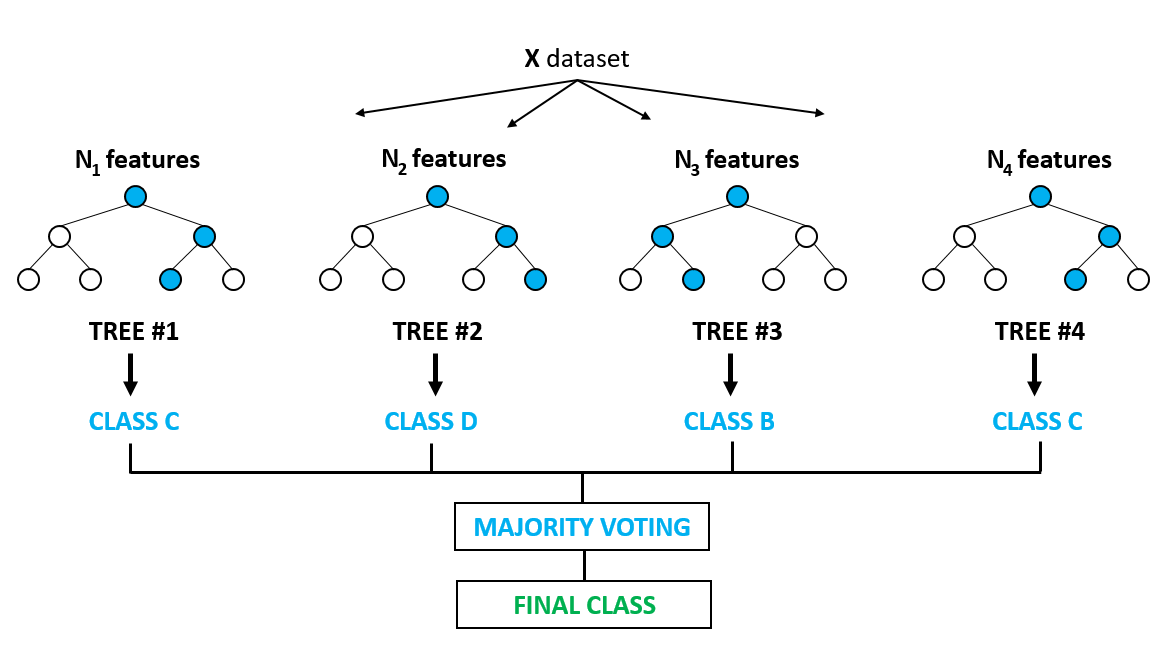
<br>
   - Use of multiple trees reduce risk of overfitting
   - Runs efficiently on larger database and produces highly accurate predictions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [4]:
x = data["Level"].values
y = data["Salary"].values

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.transform(x_test)
scale_y = StandardScaler()
y_train = scale_y.fit_transform(y_train)

In [11]:
model = RandomForestRegressor(random_state=0)
model.fit(x,y)

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=0)

In [14]:
print(data.Level)
print(data.Salary)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


## Visualization

In [15]:
len(model.estimators_)

100

/home/nsl54/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


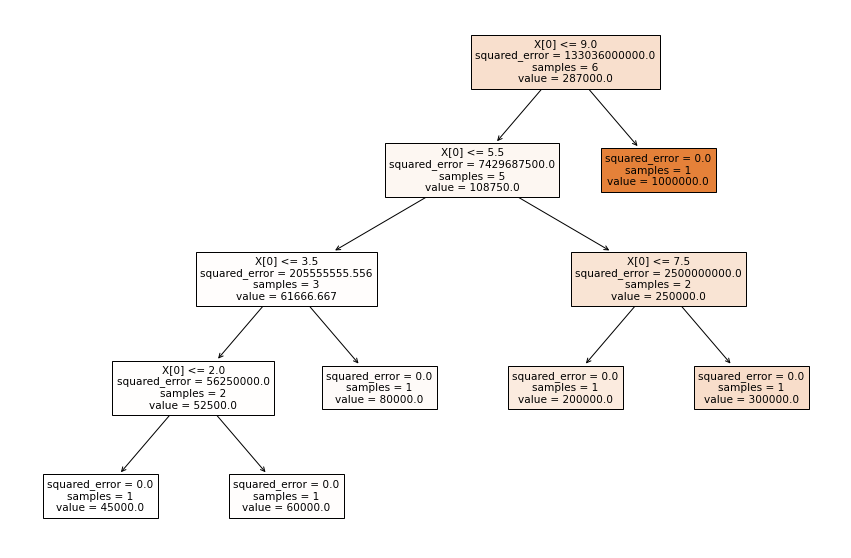

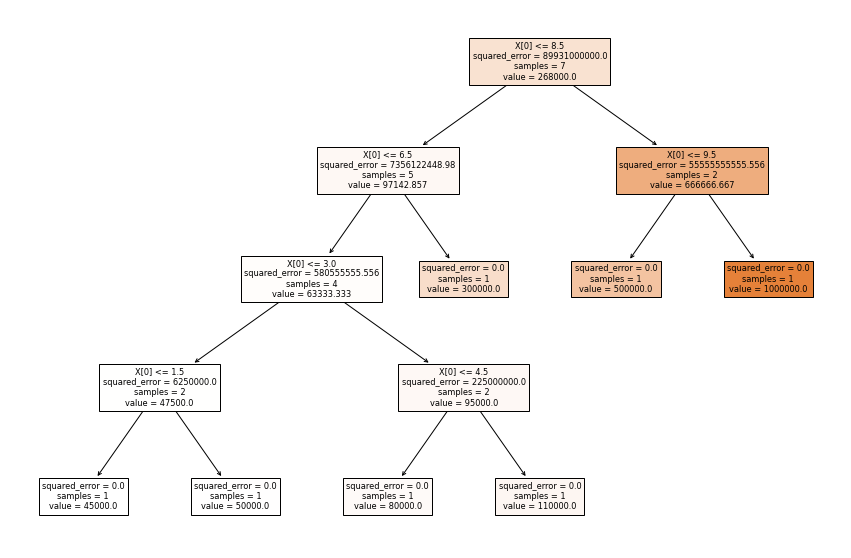

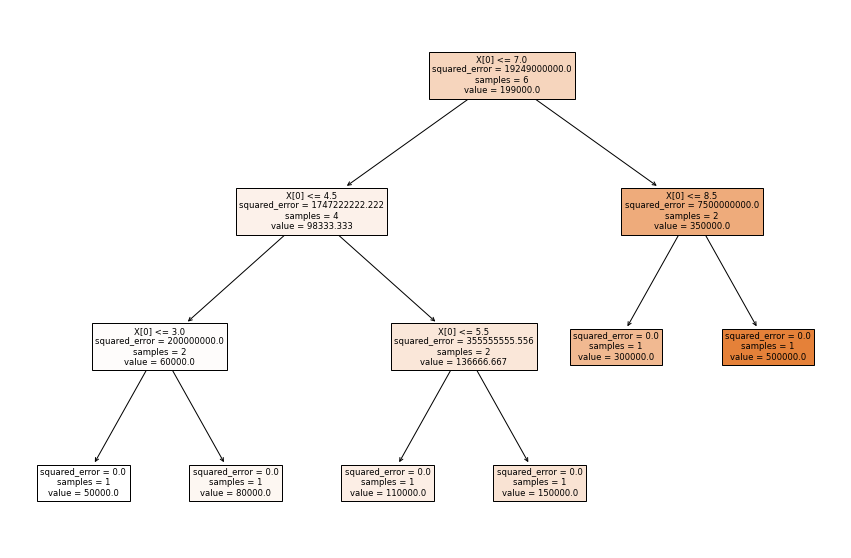

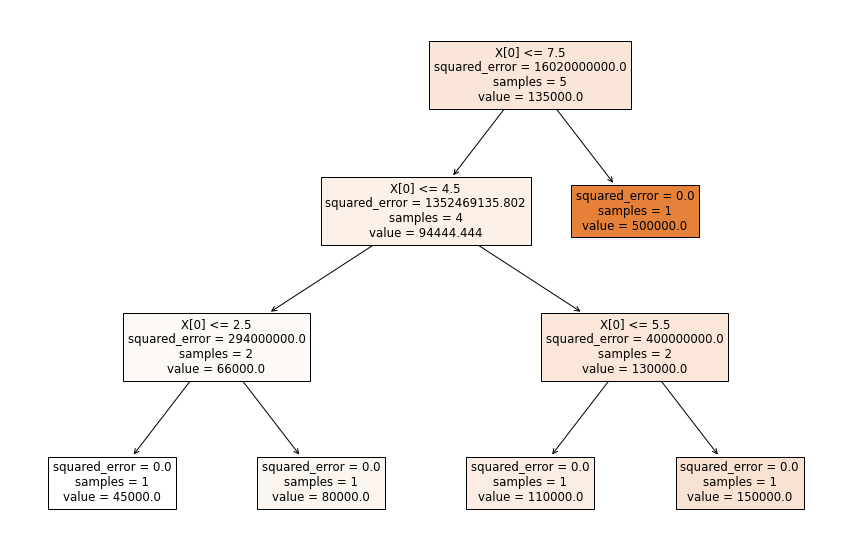

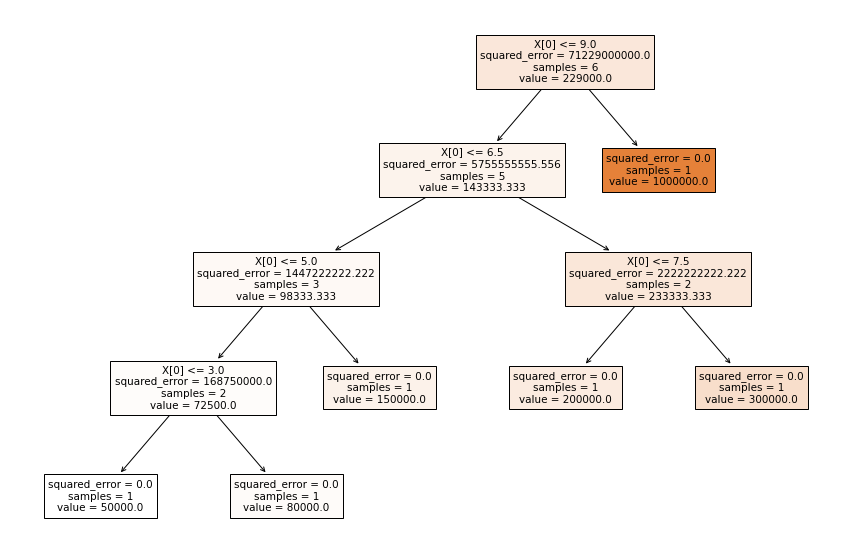

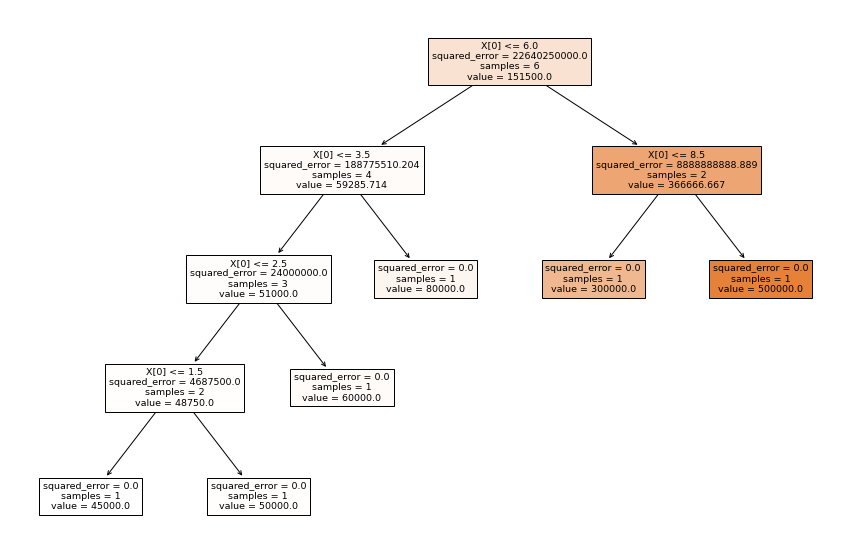

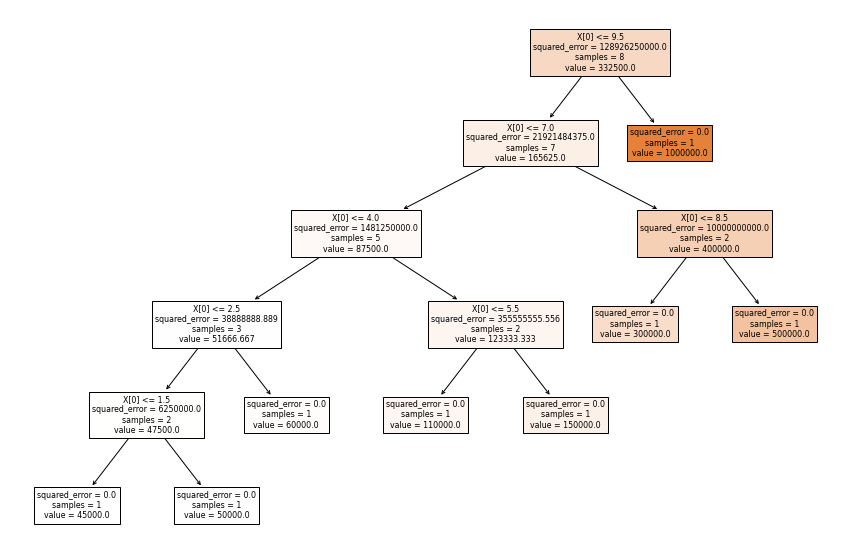

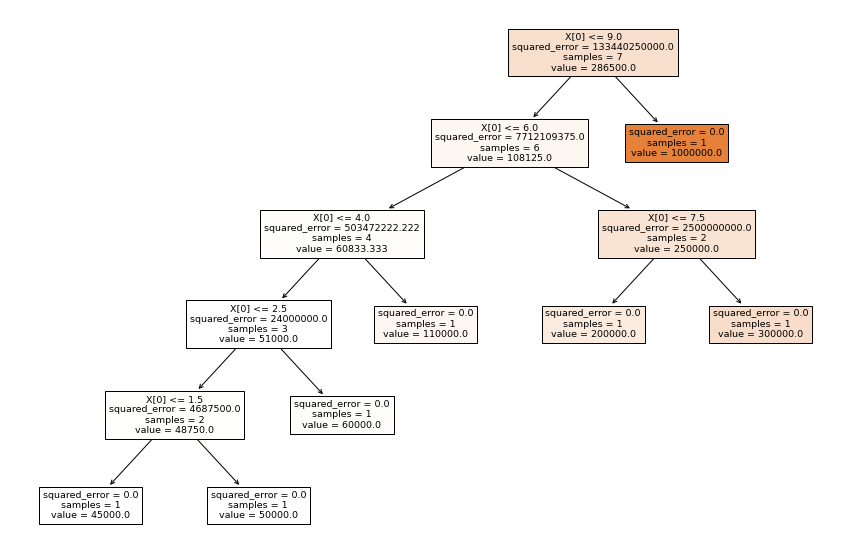

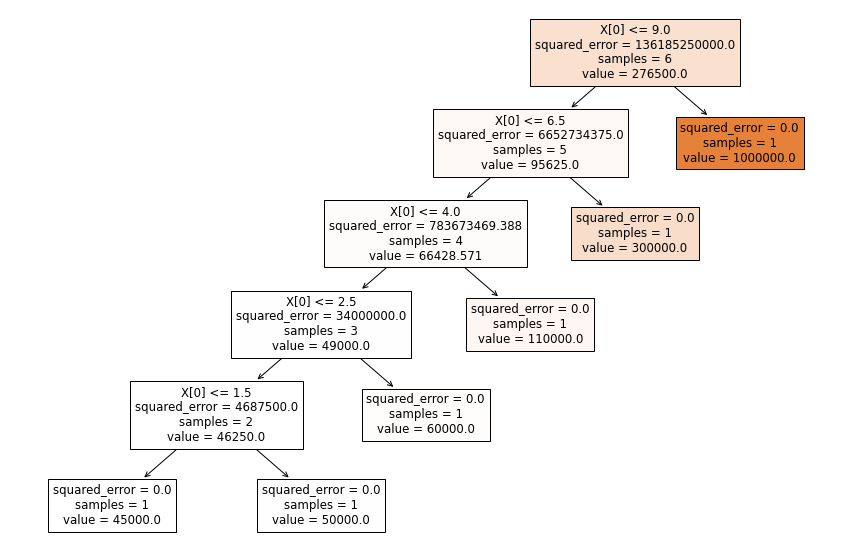

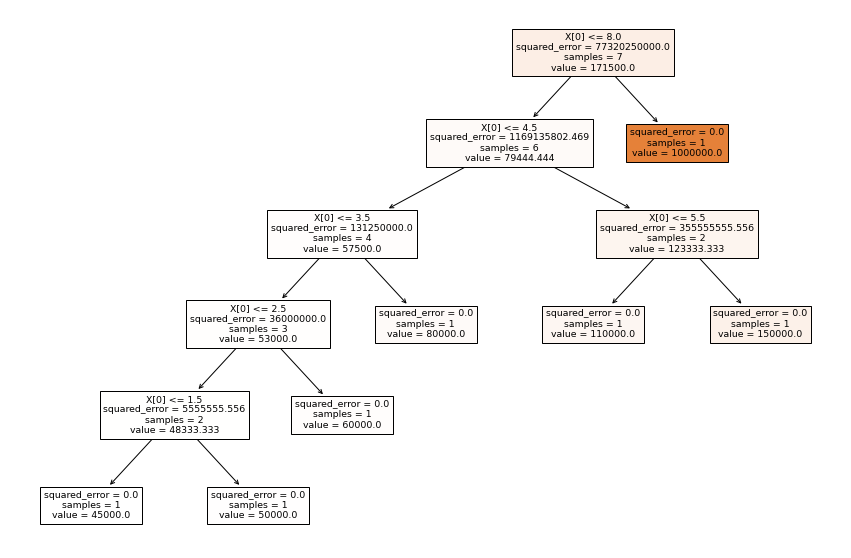

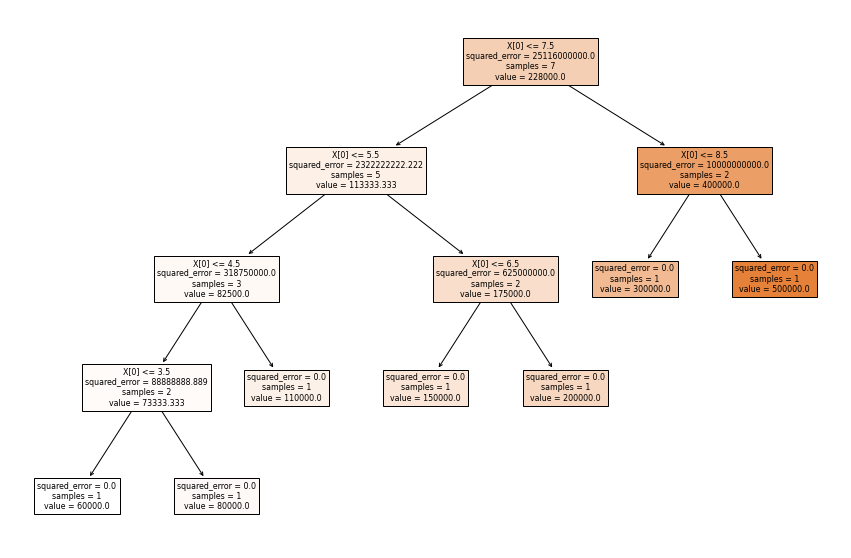

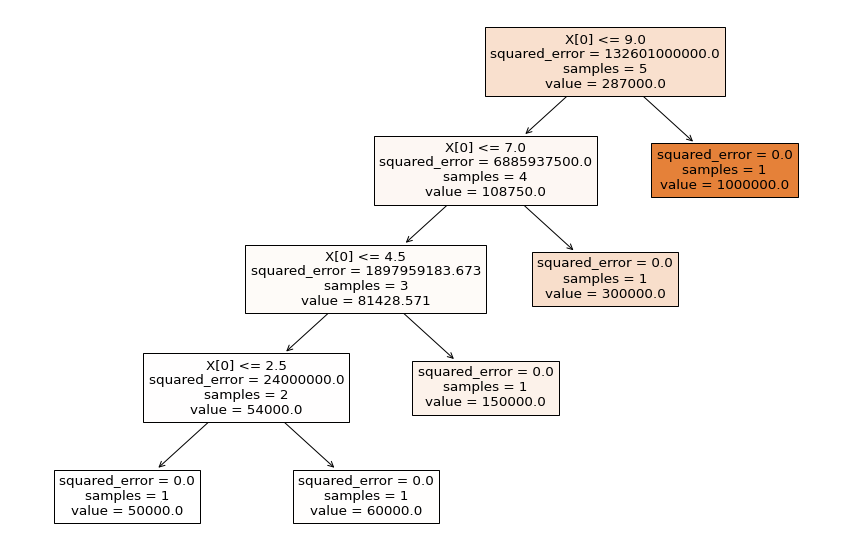

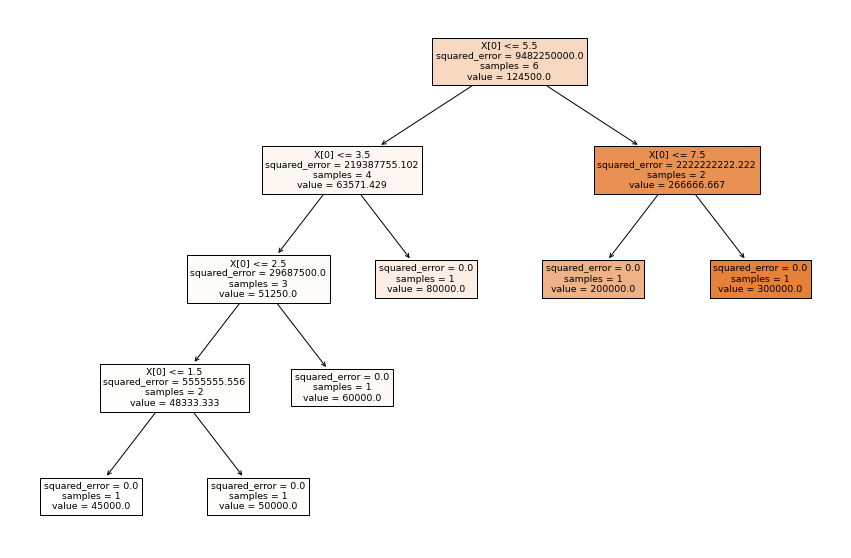

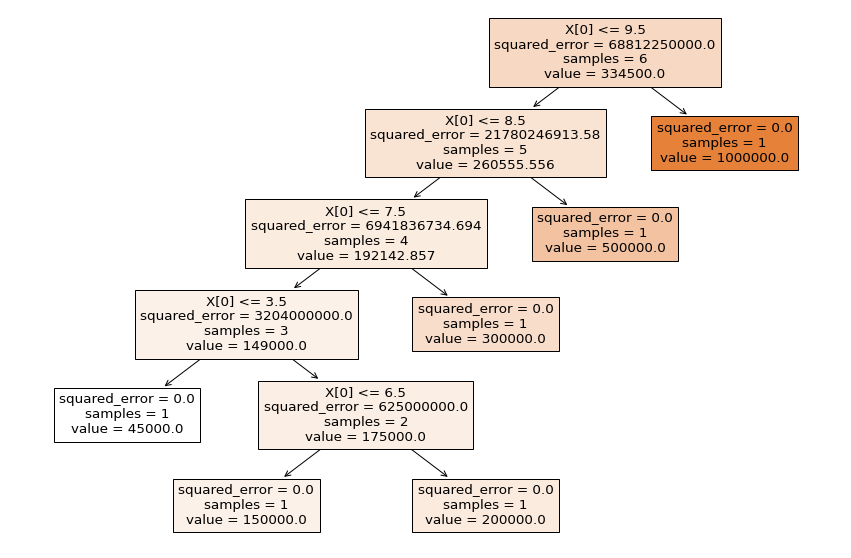

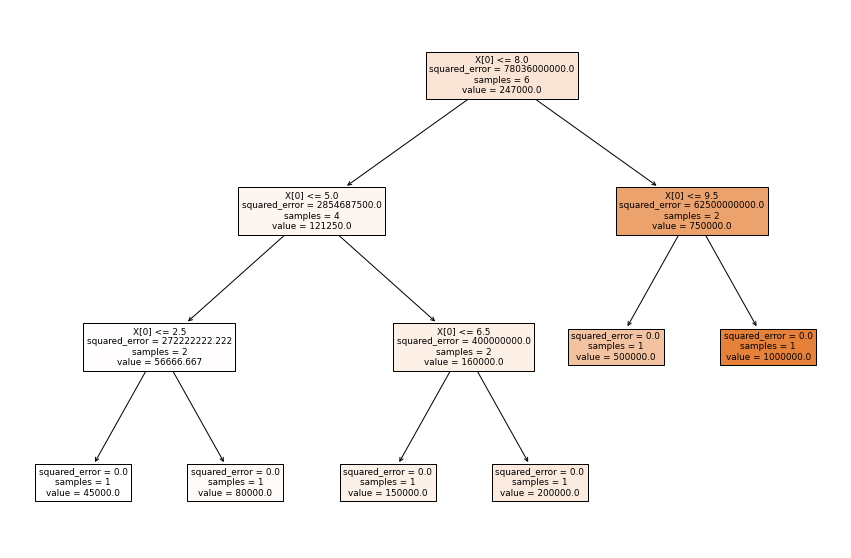

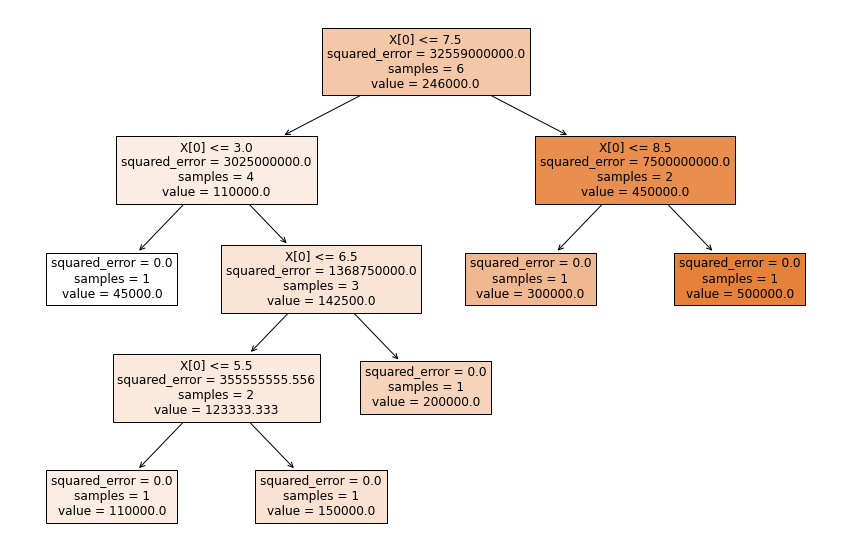

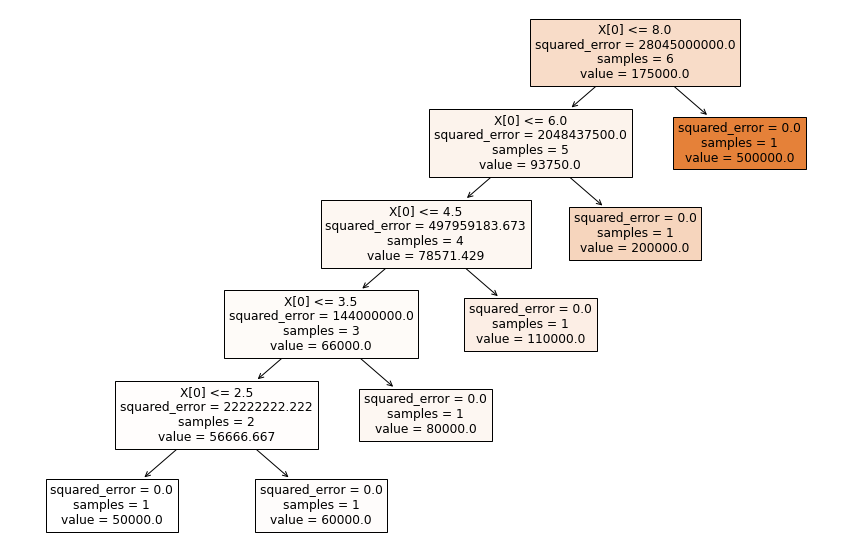

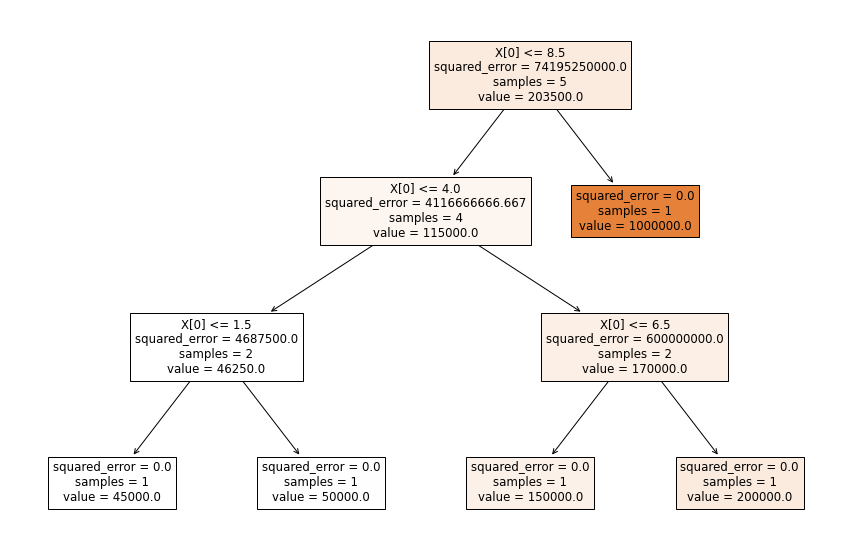

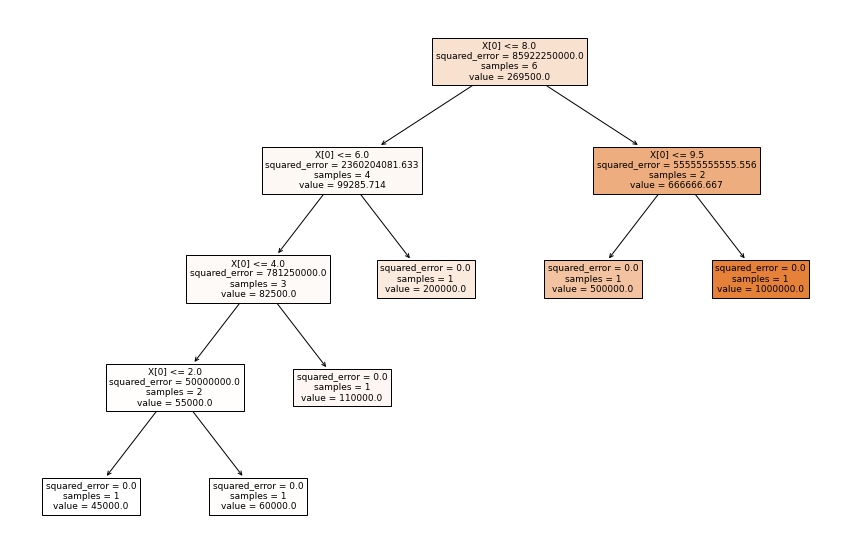

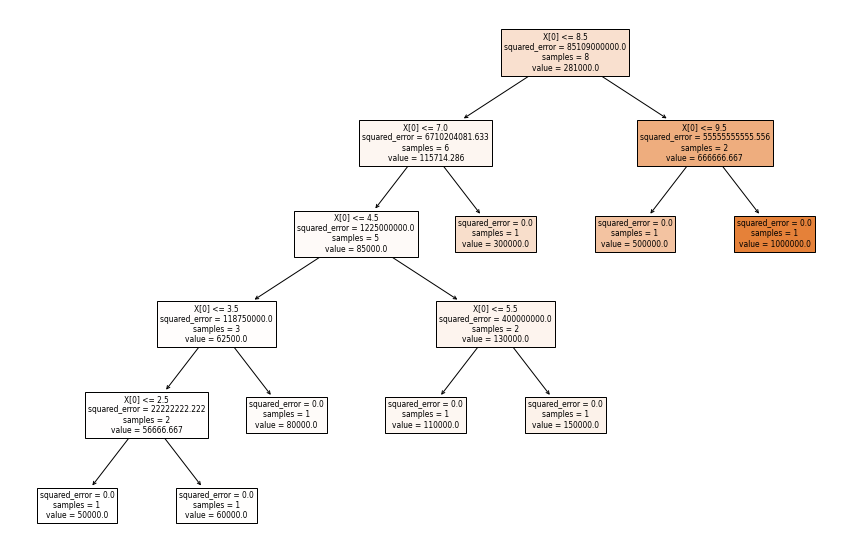

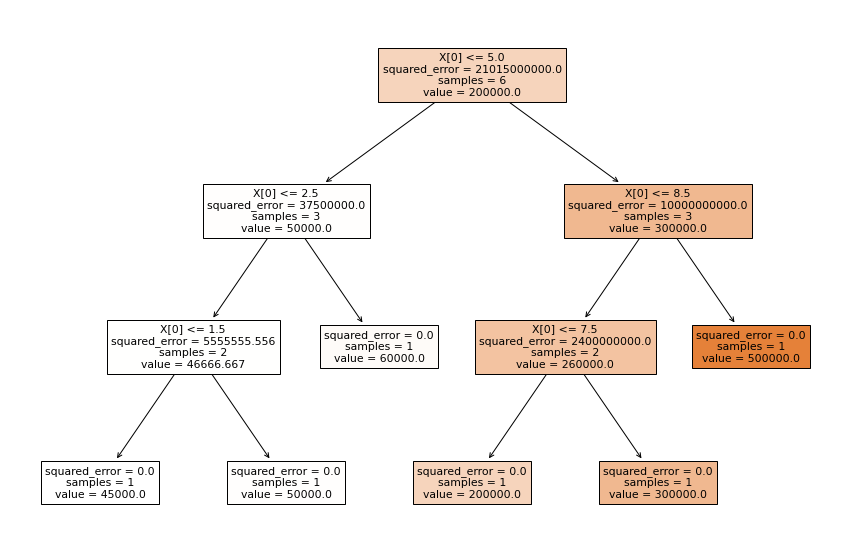

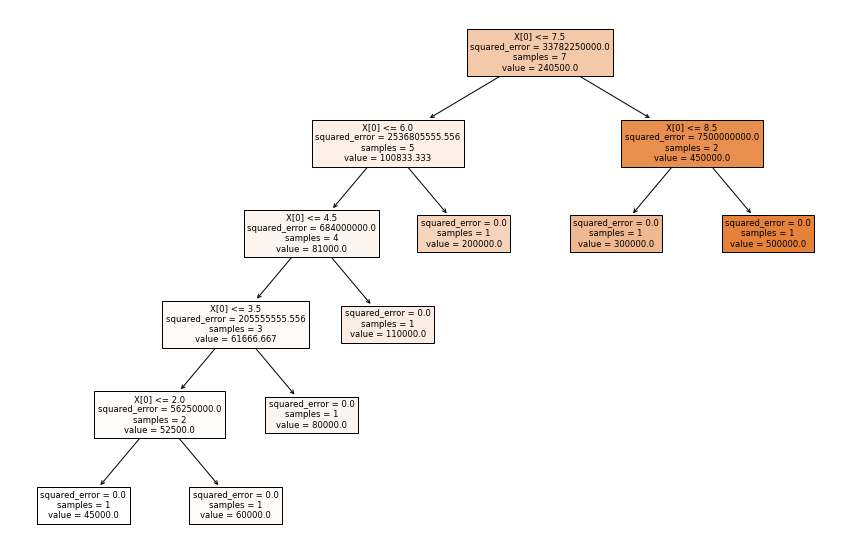

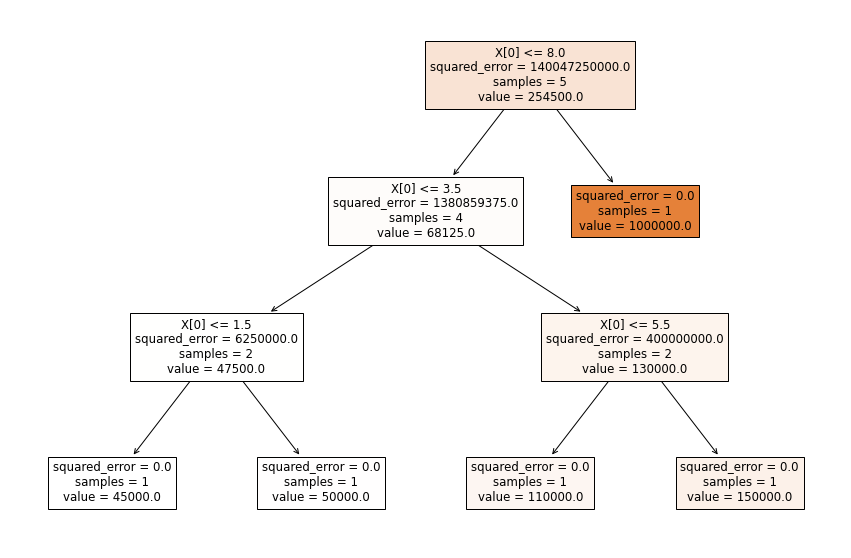

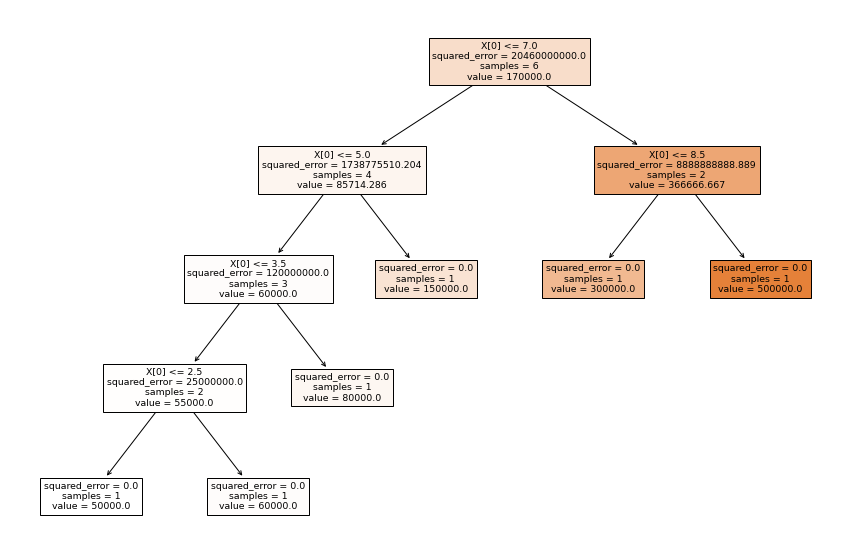

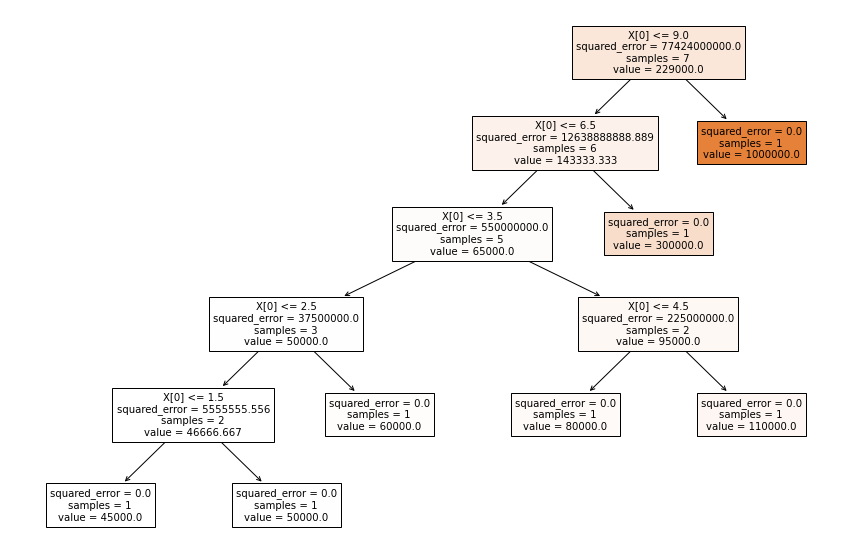

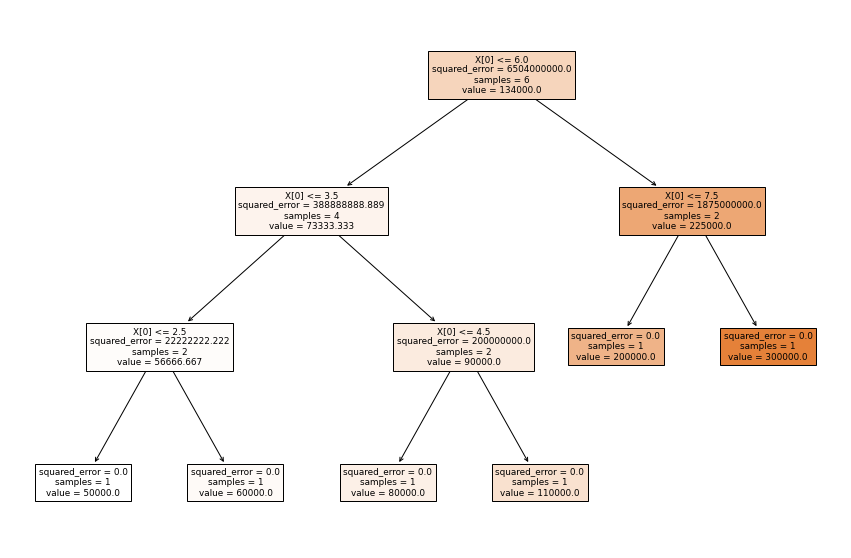

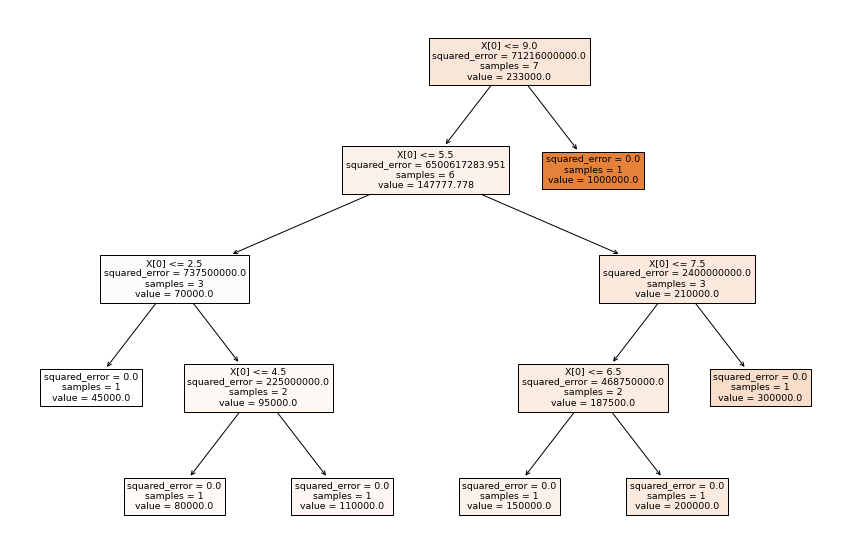

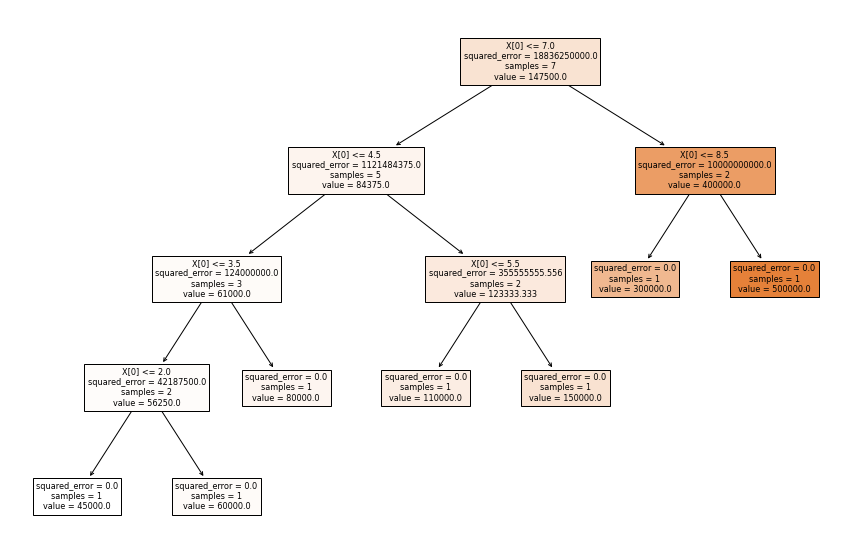

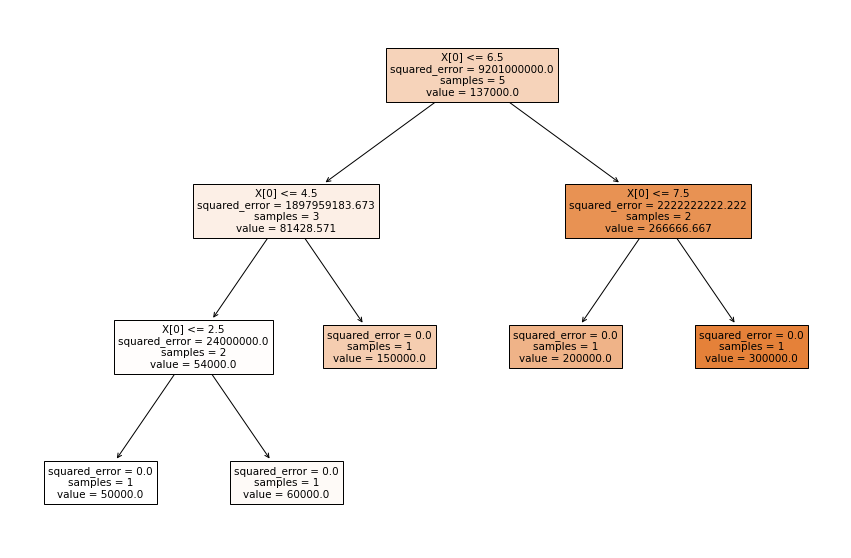

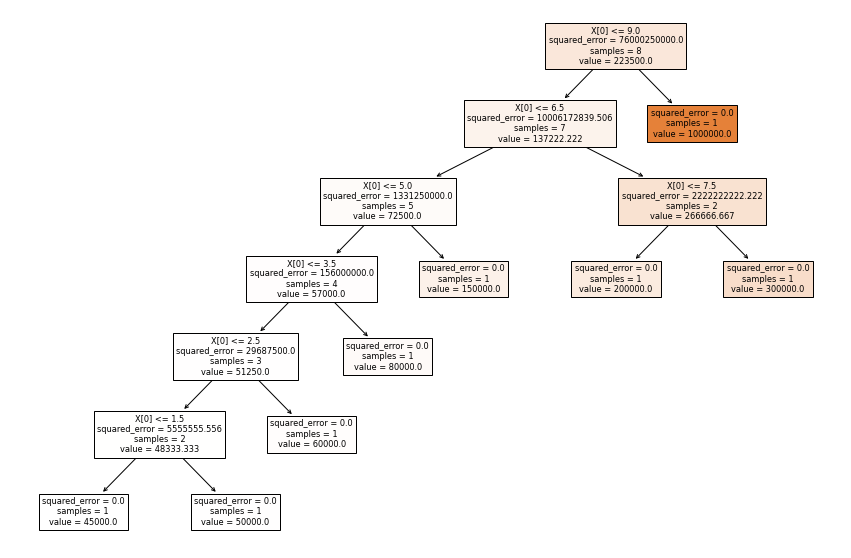

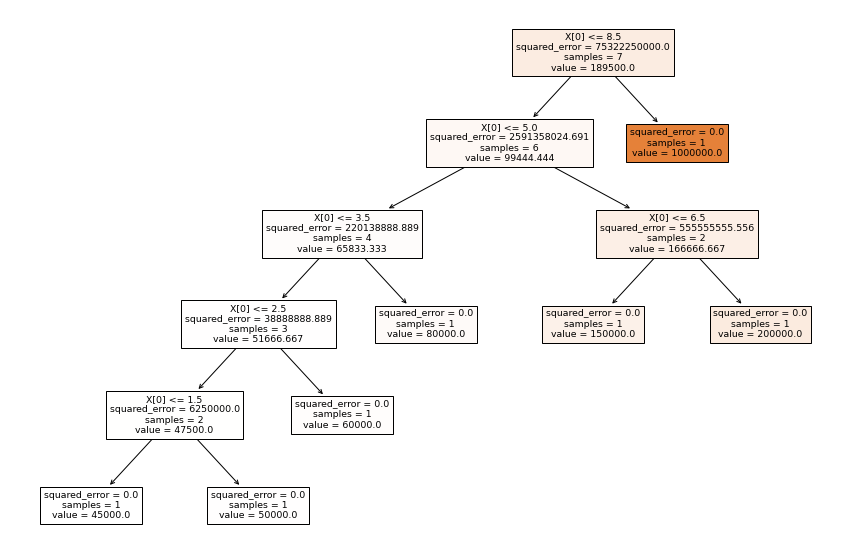

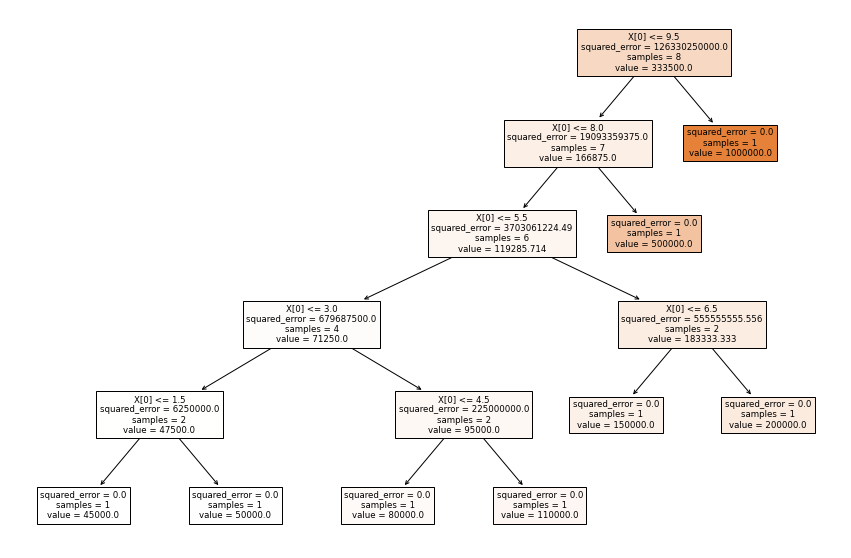

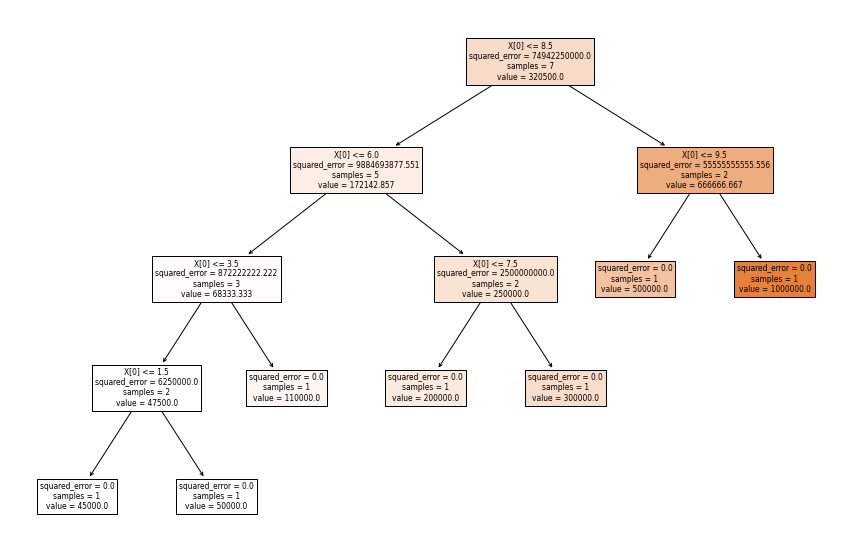

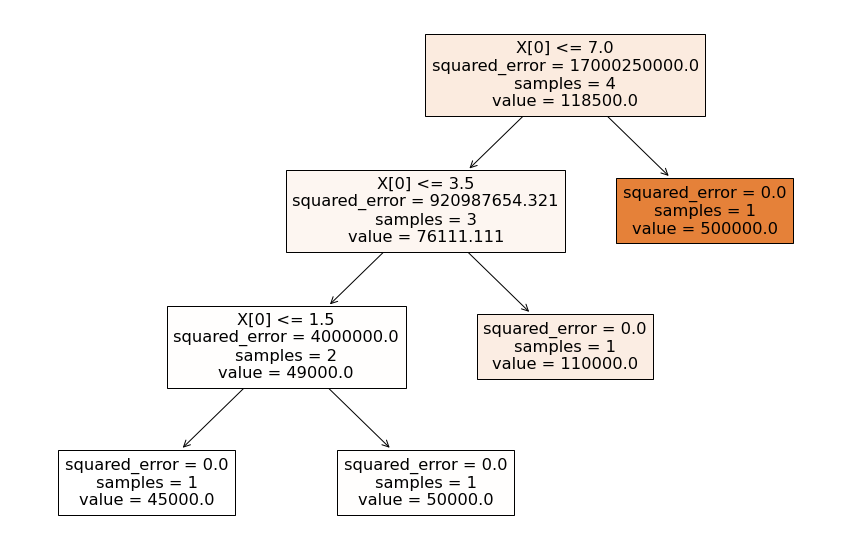

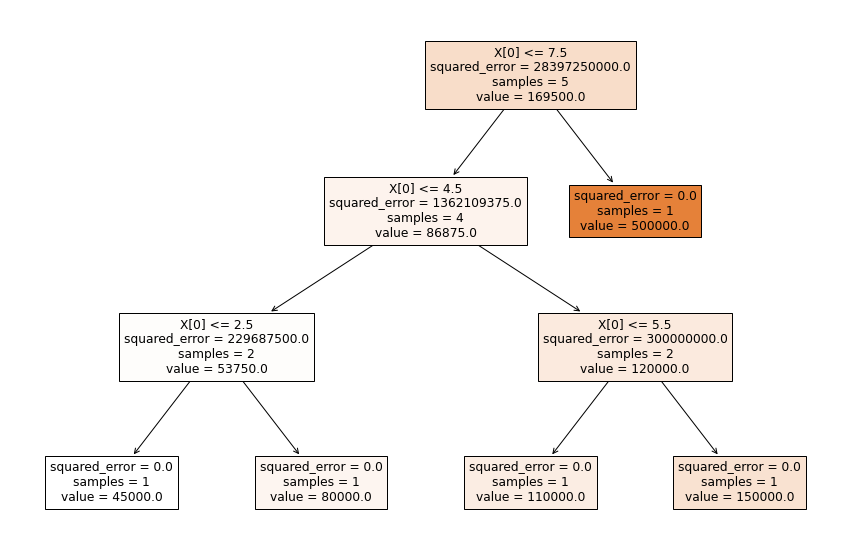

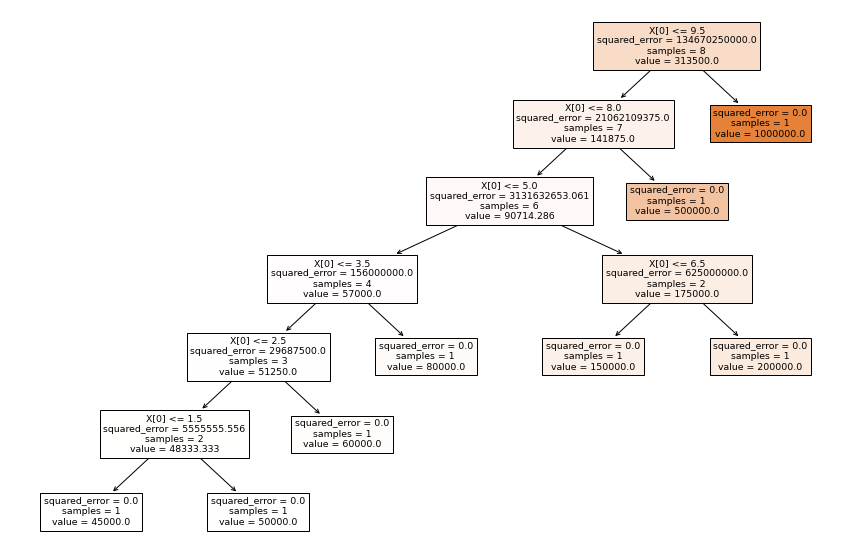

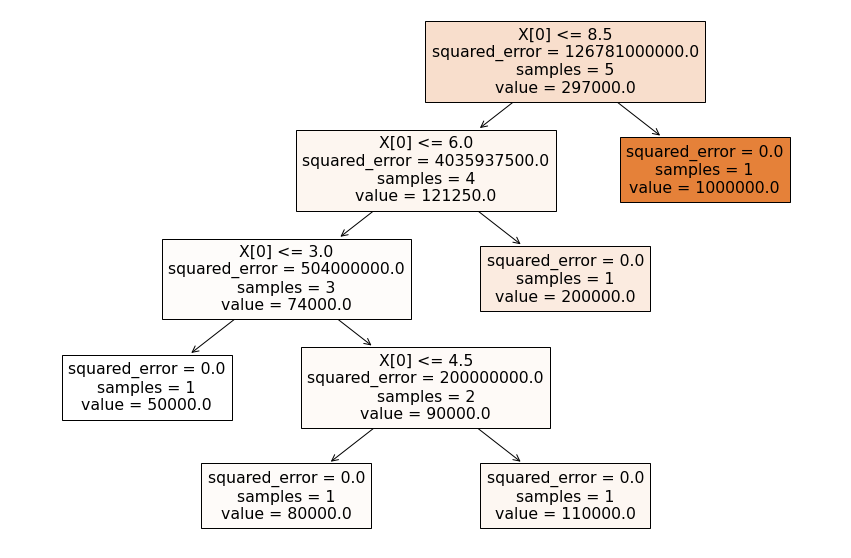

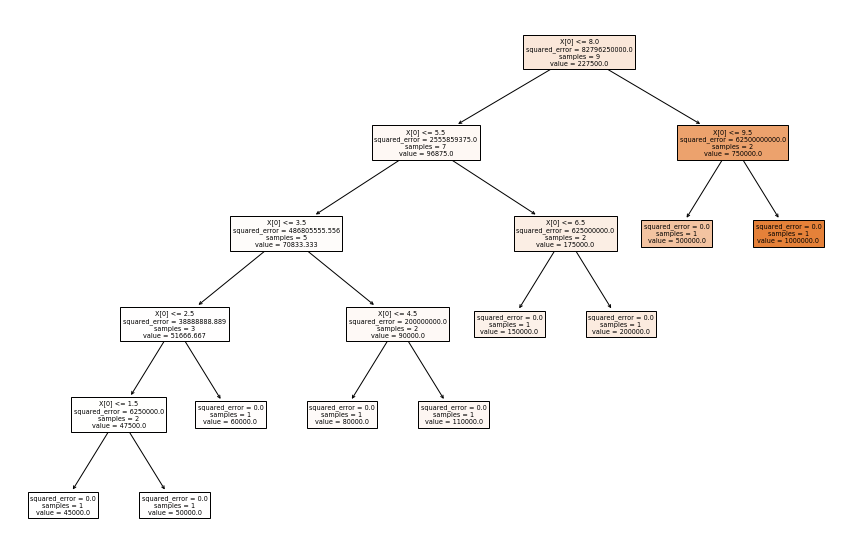

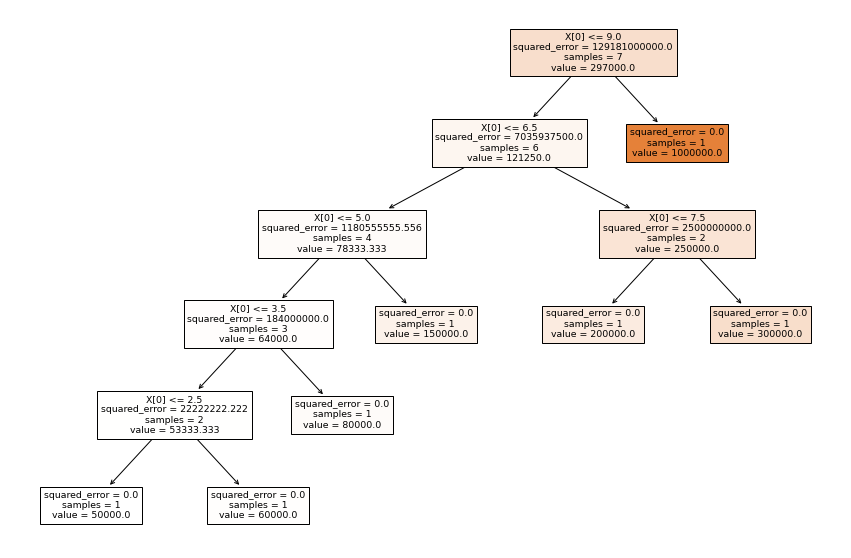

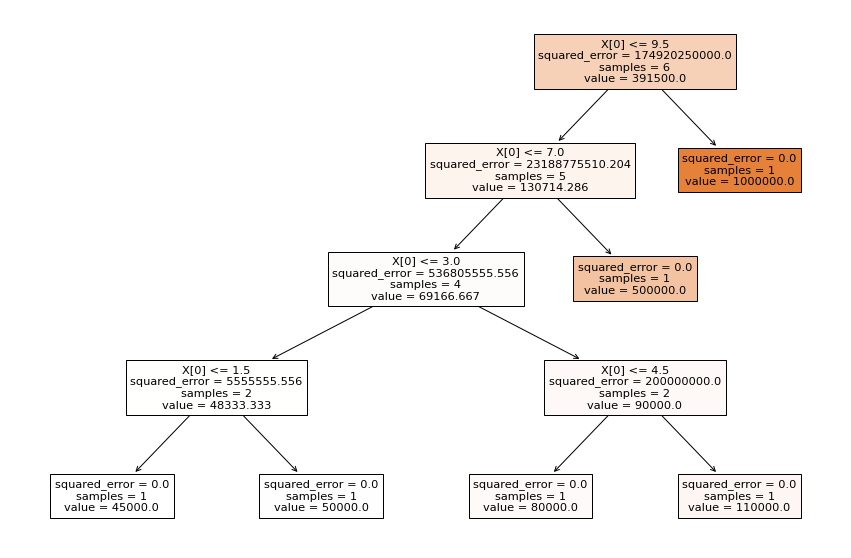

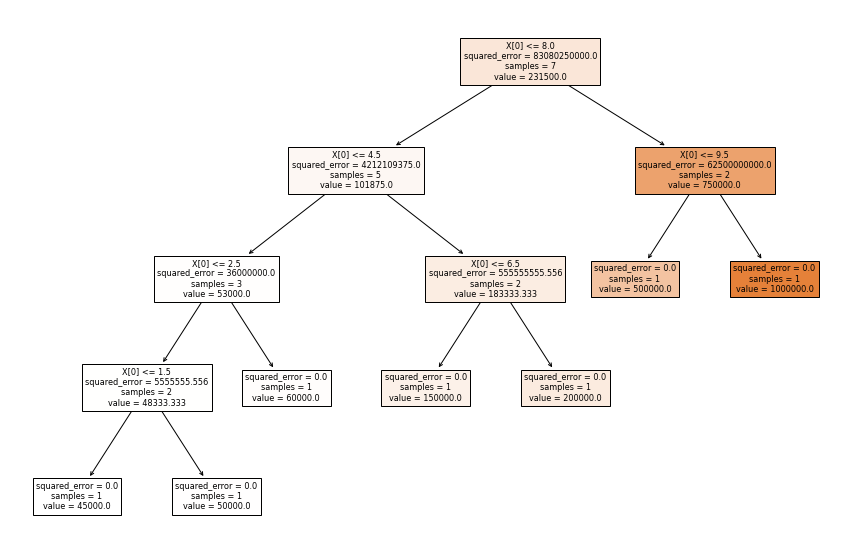

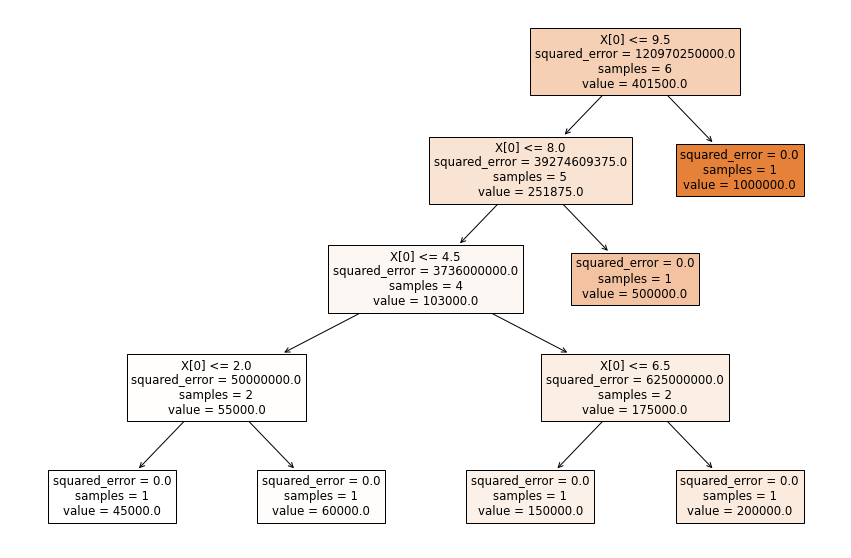

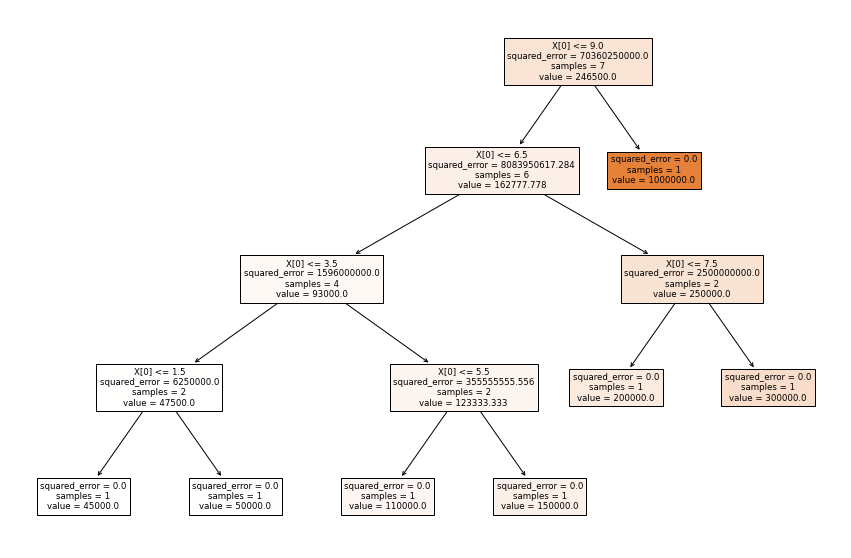

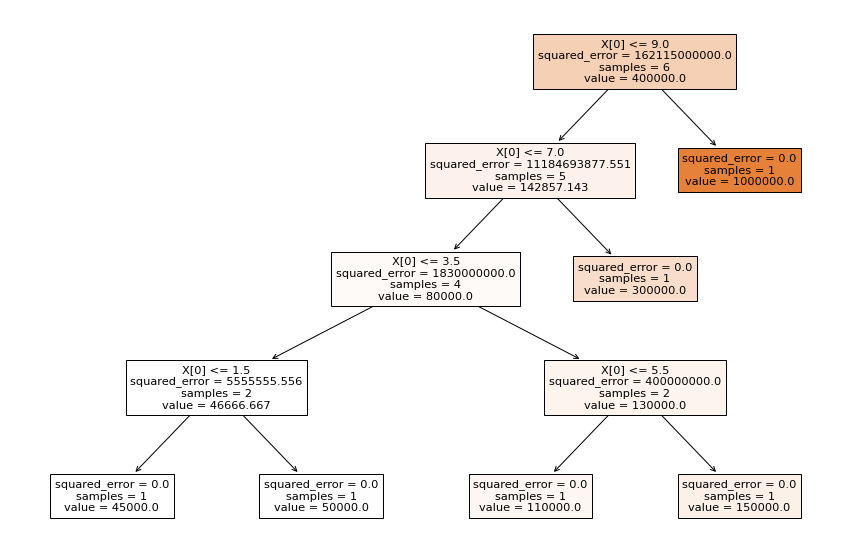

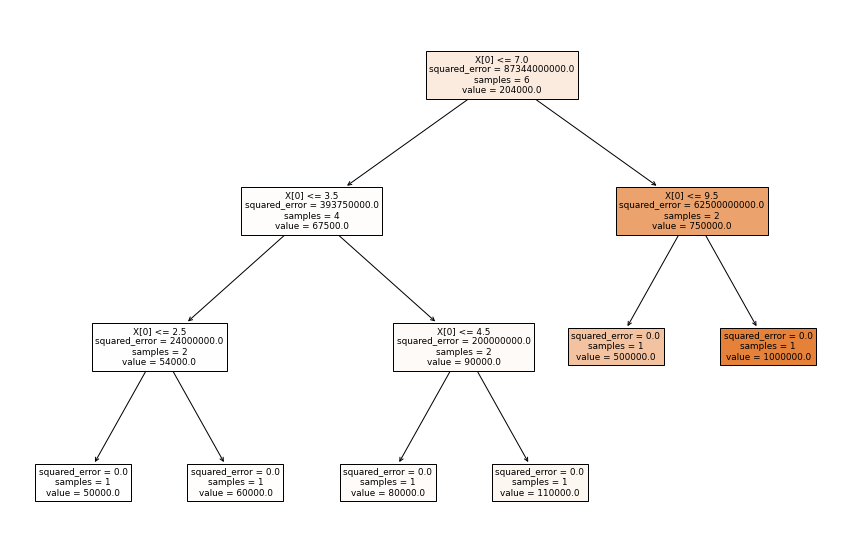

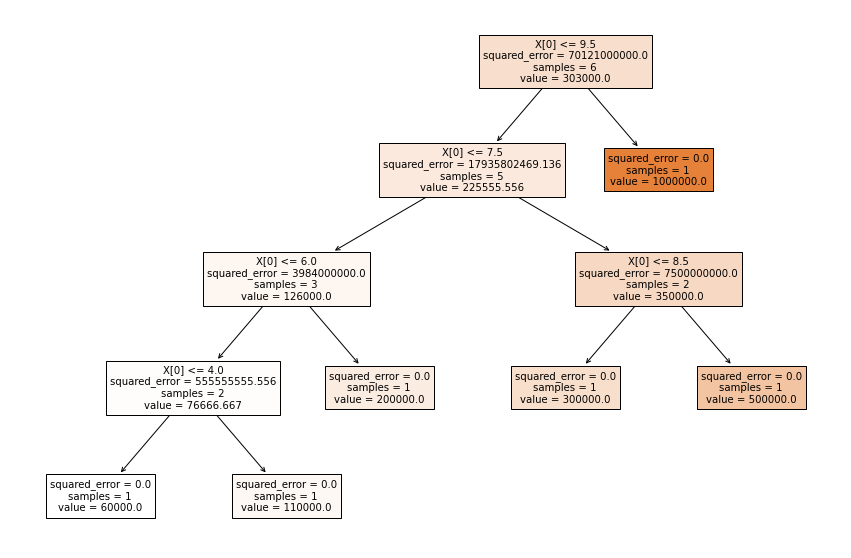

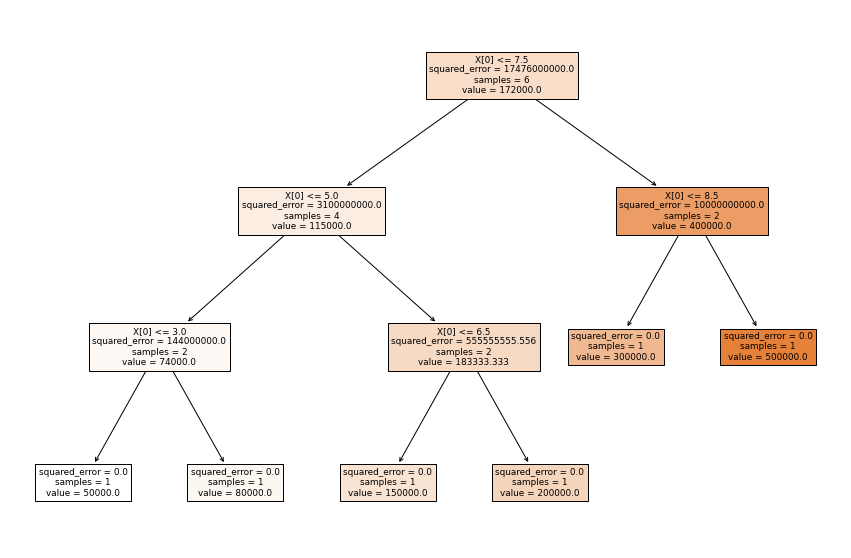

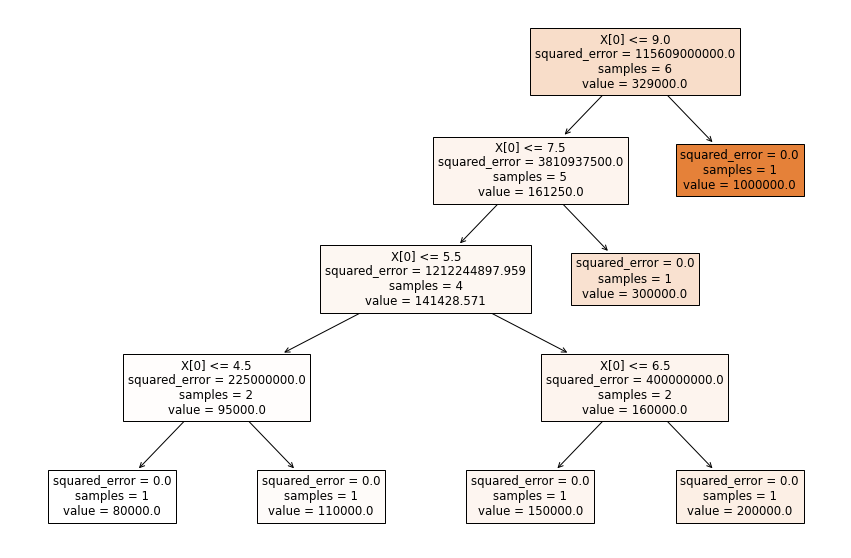

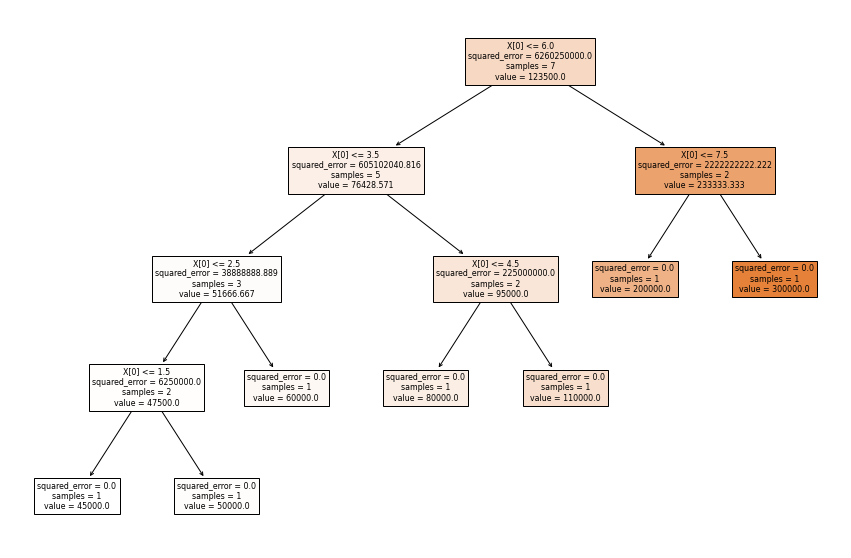

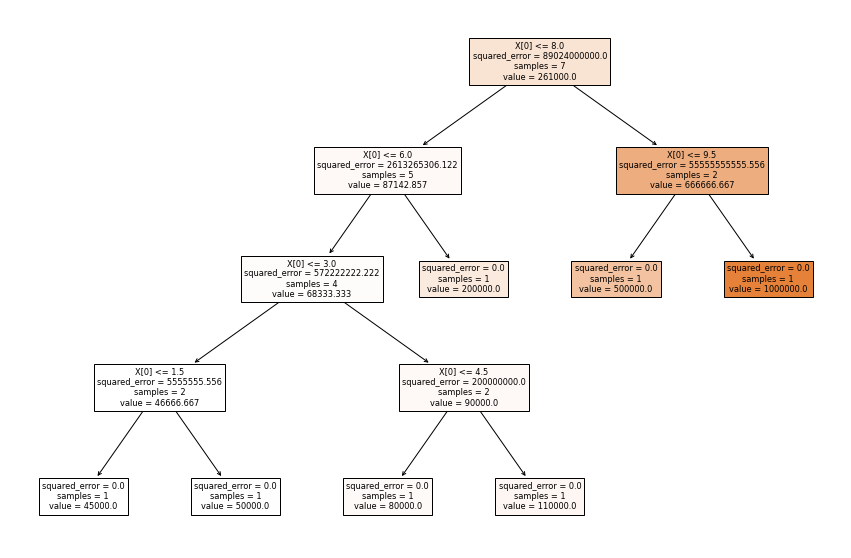

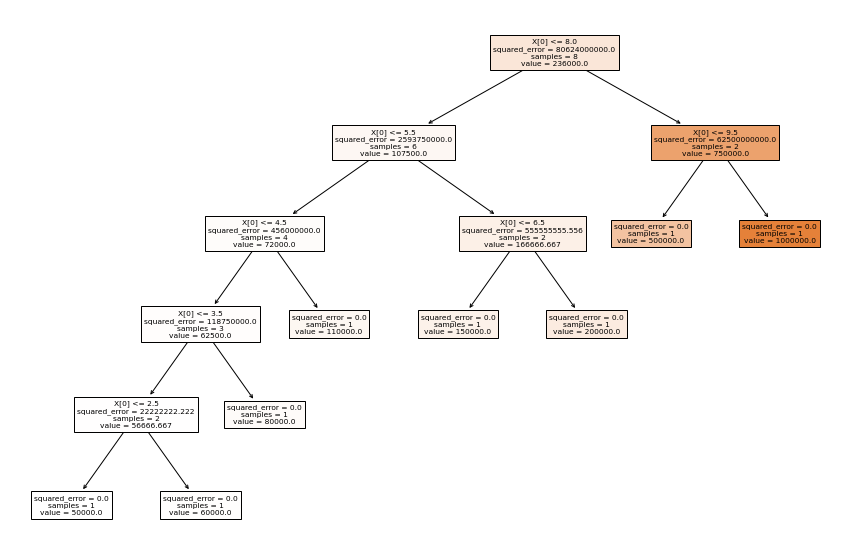

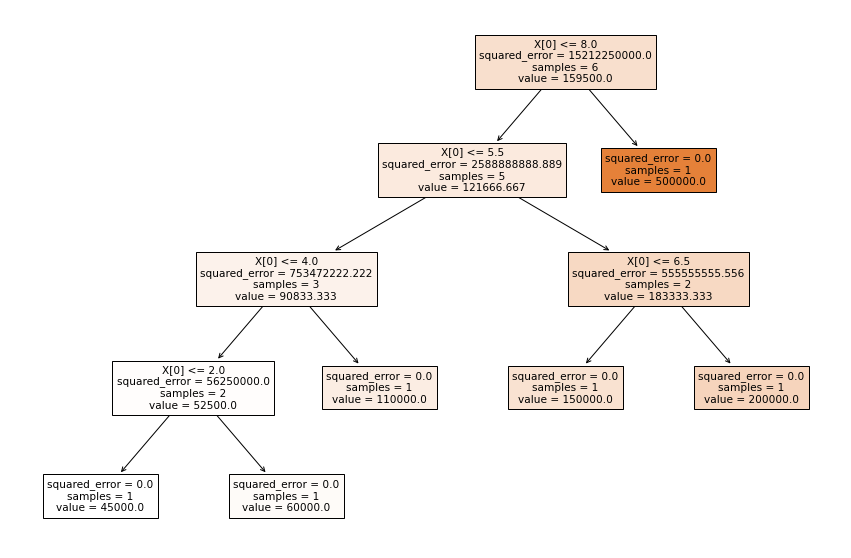

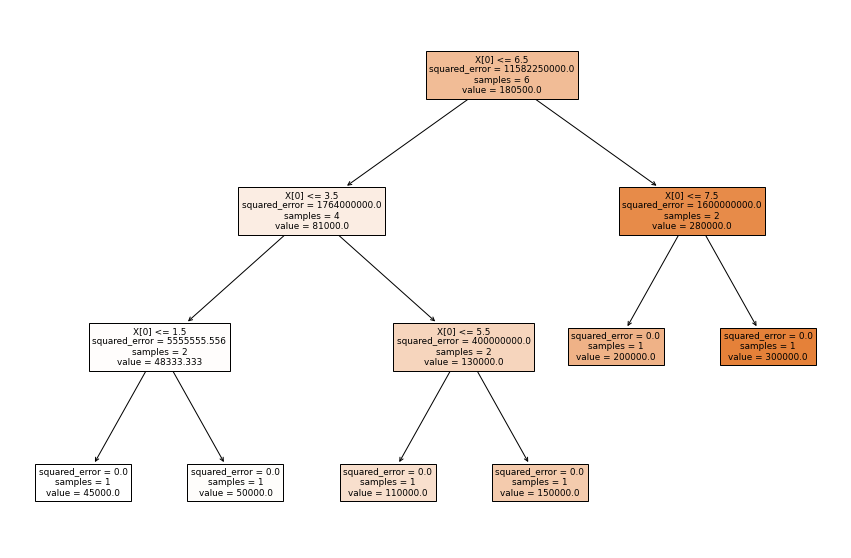

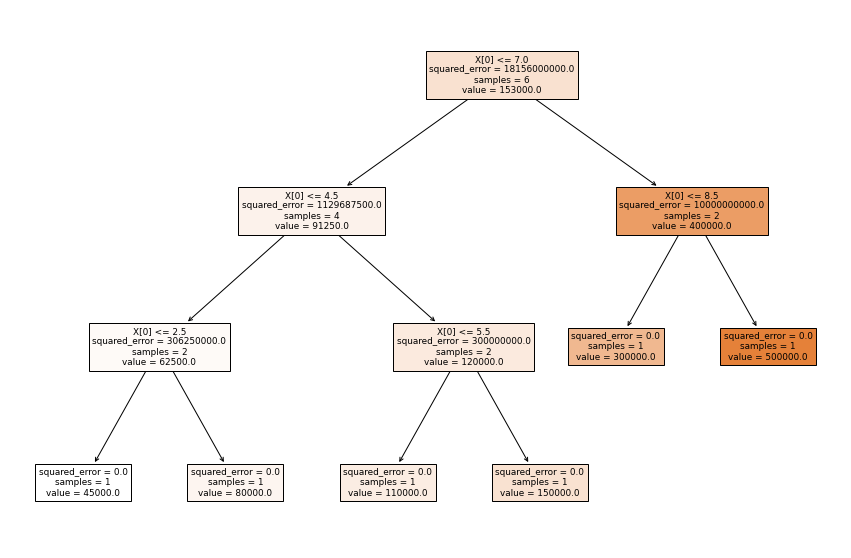

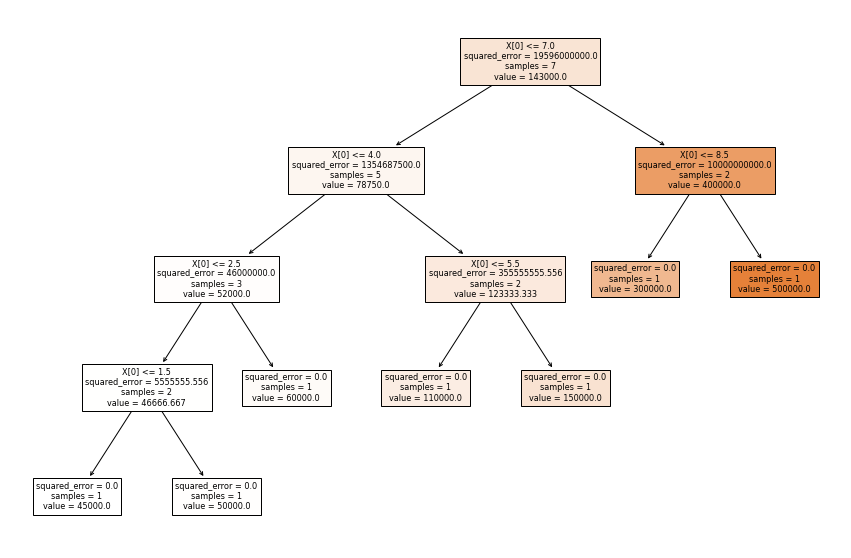

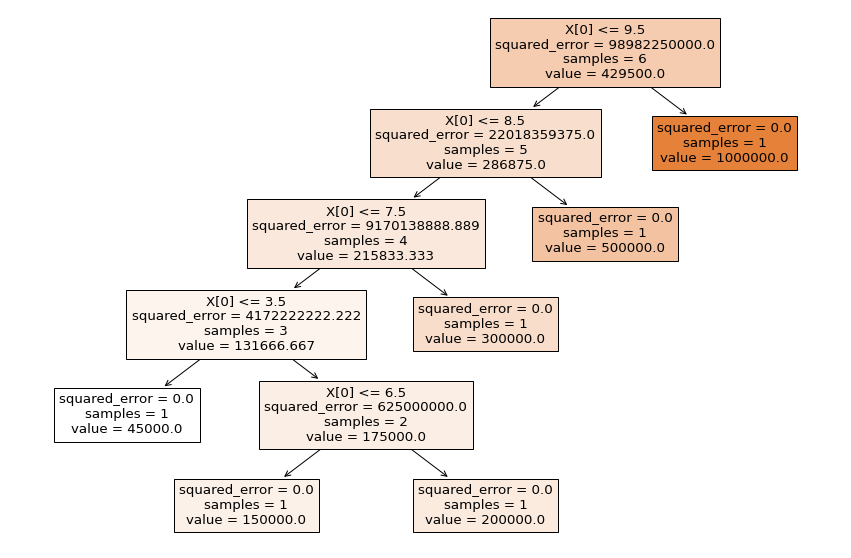

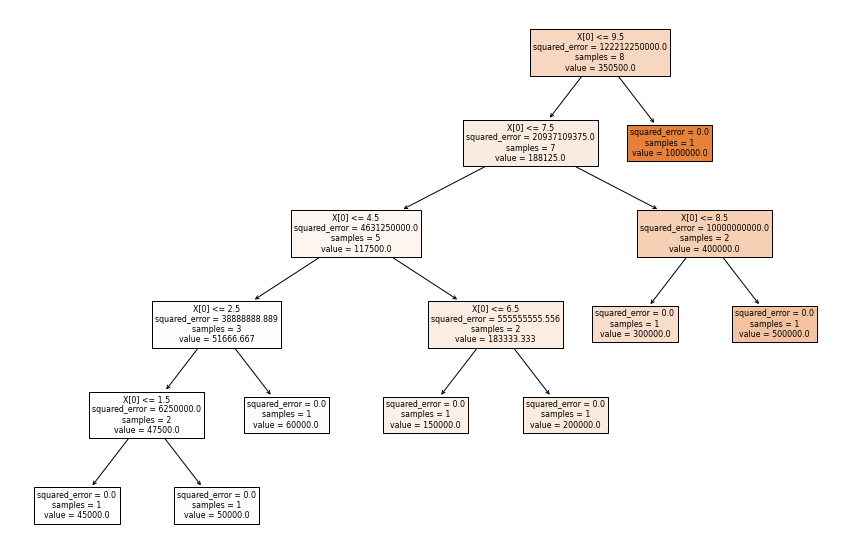

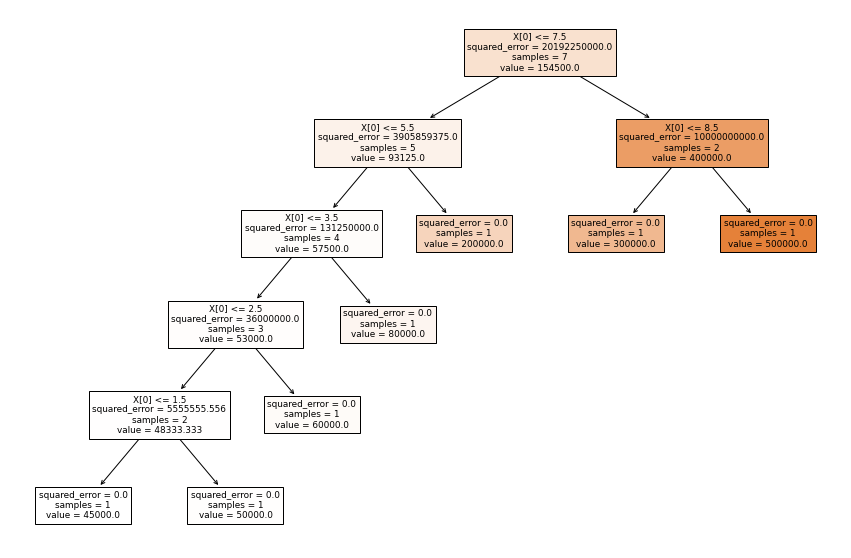

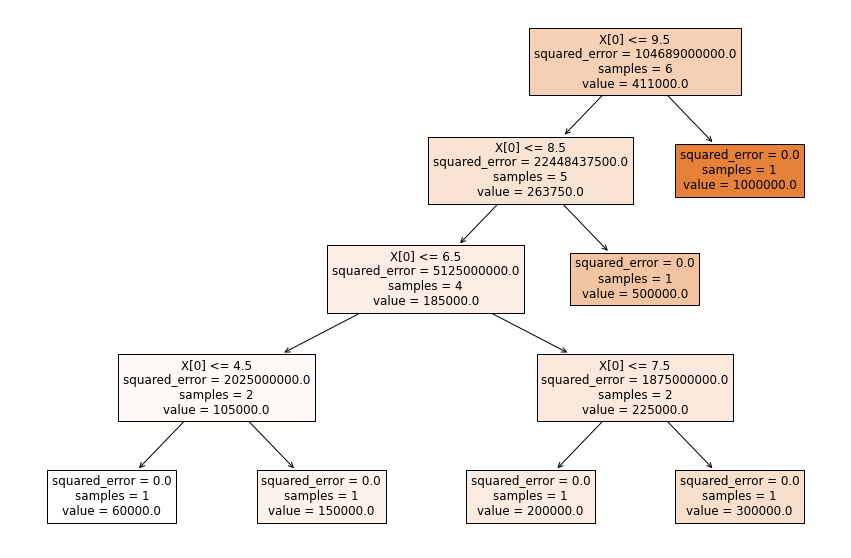

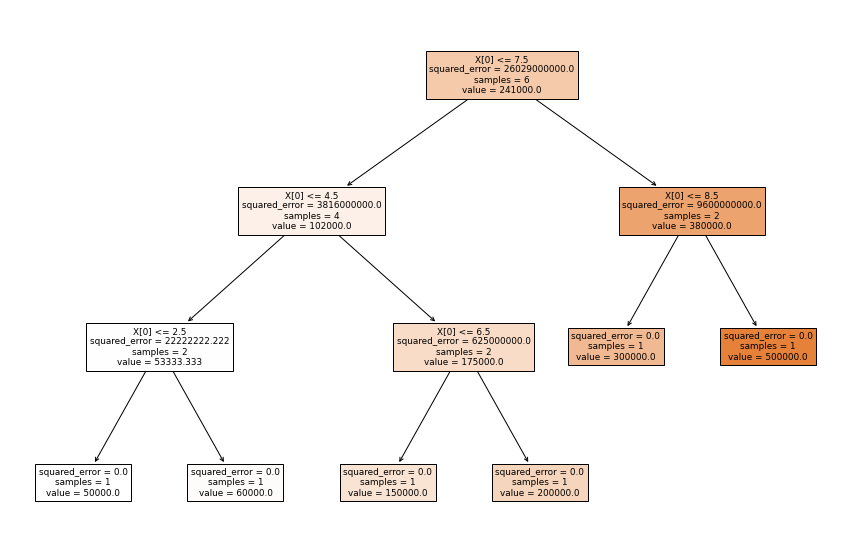

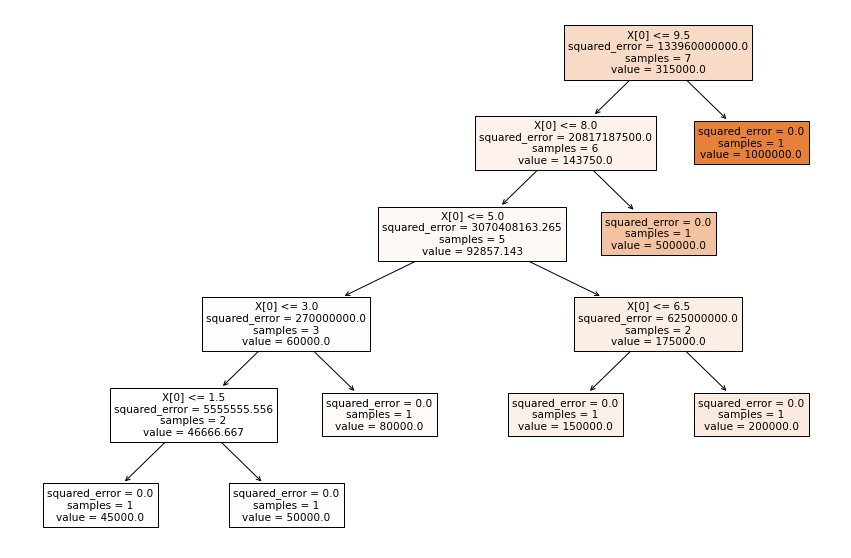

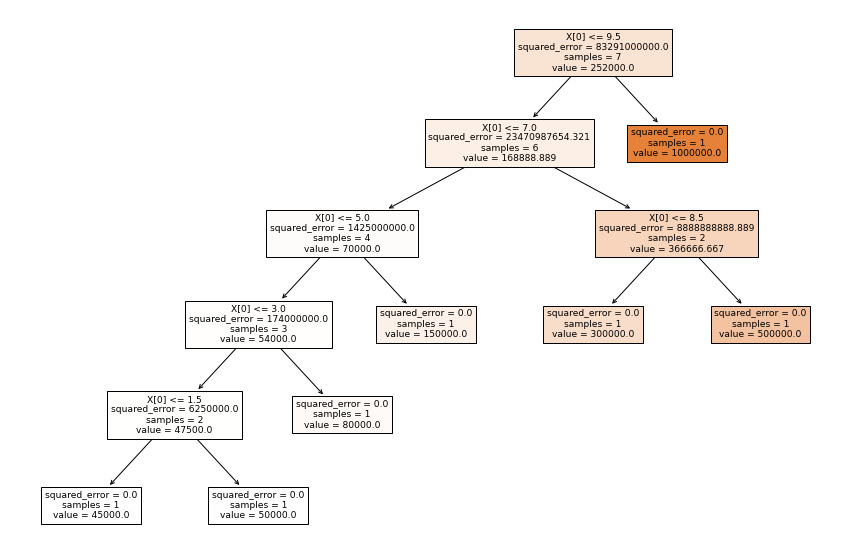

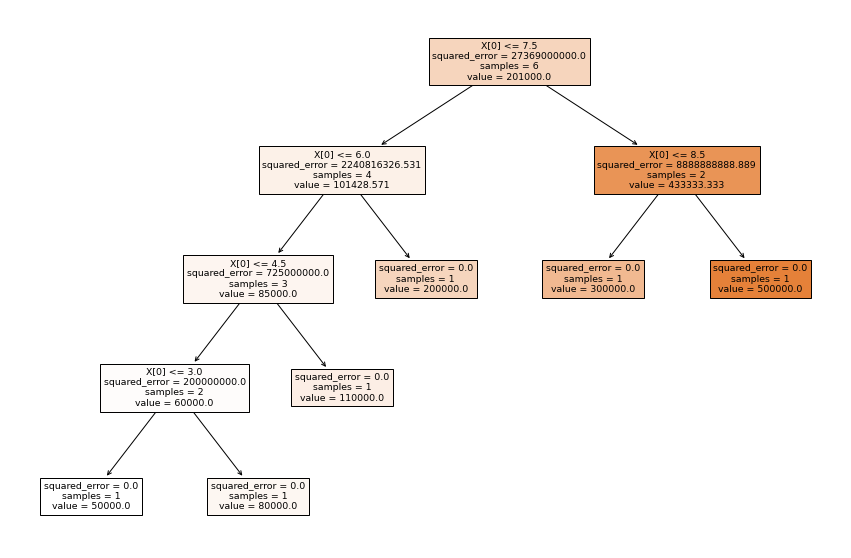

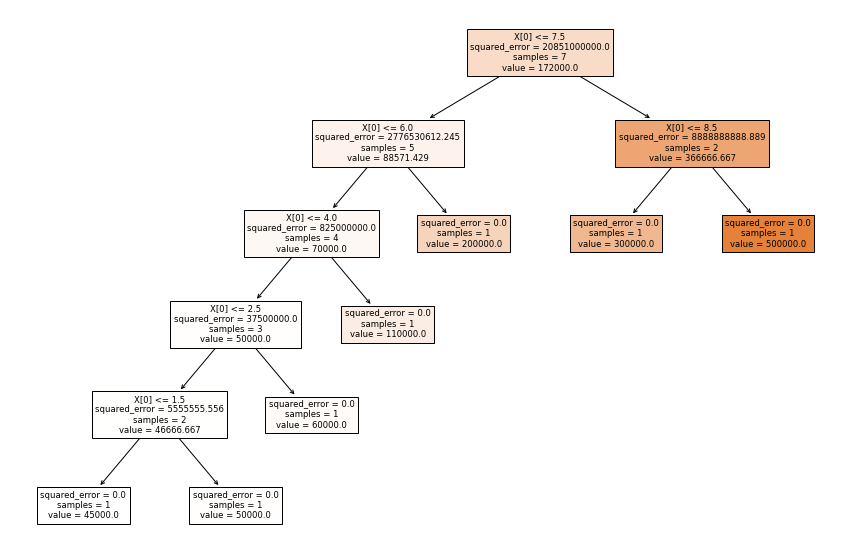

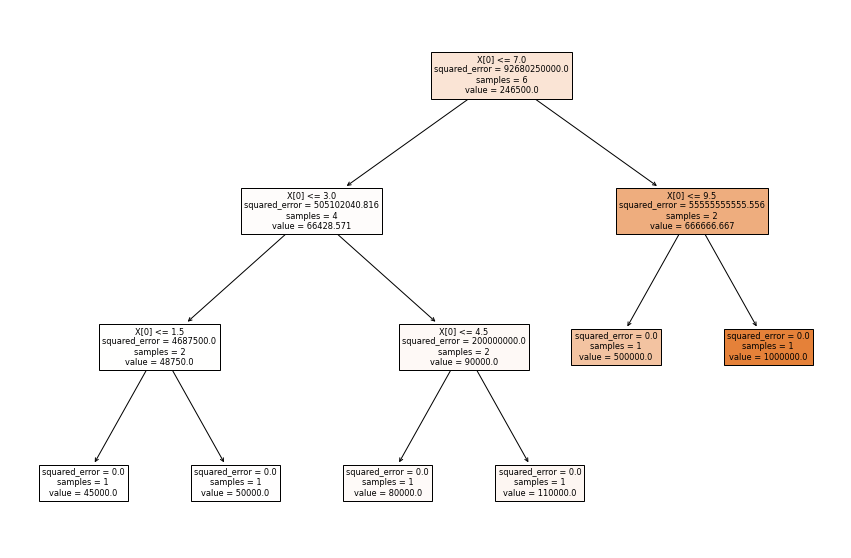

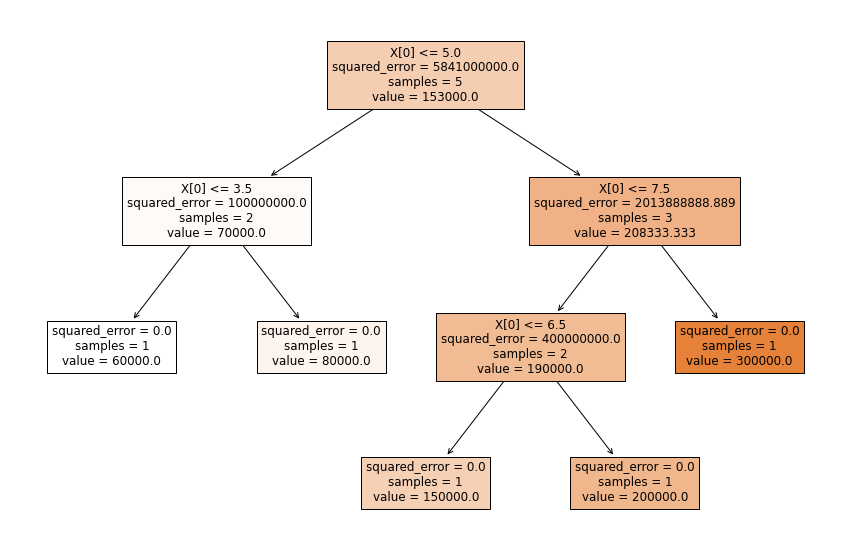

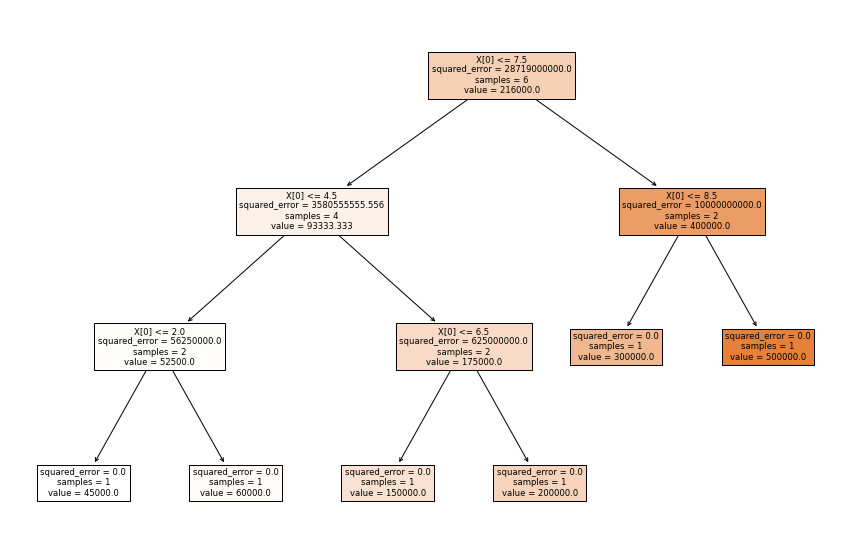

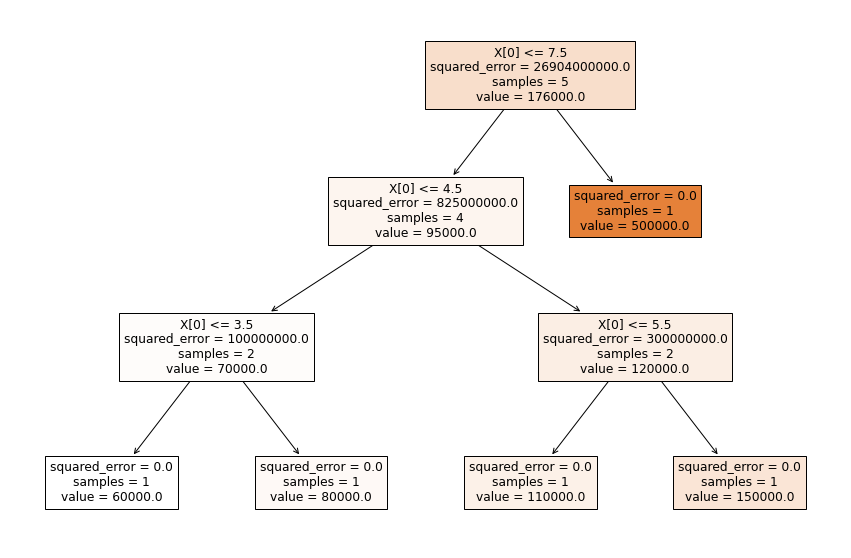

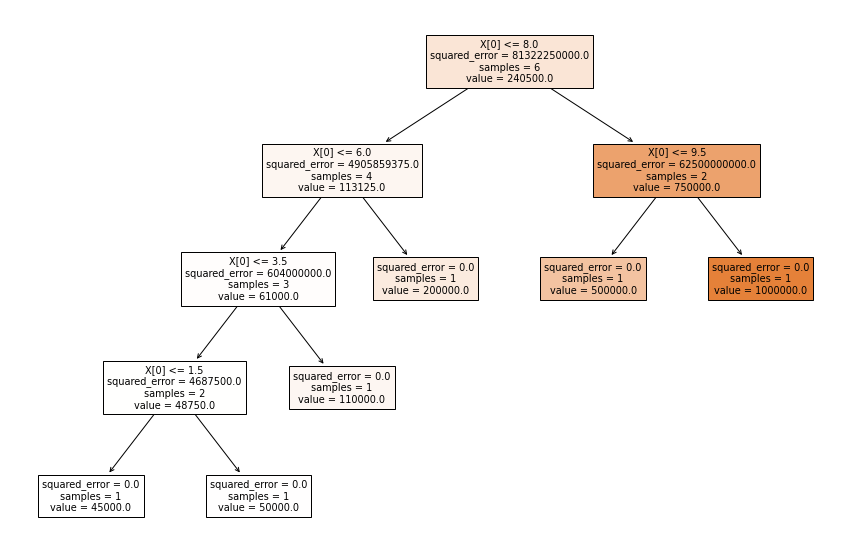

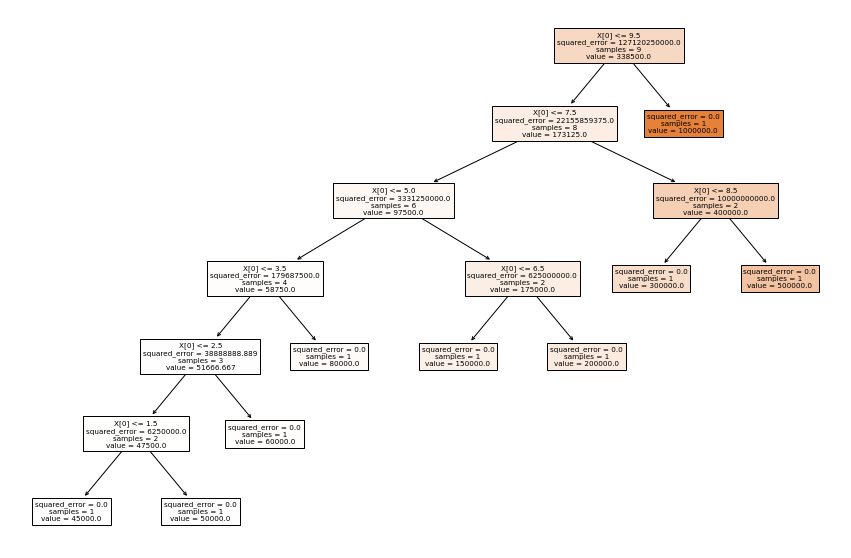

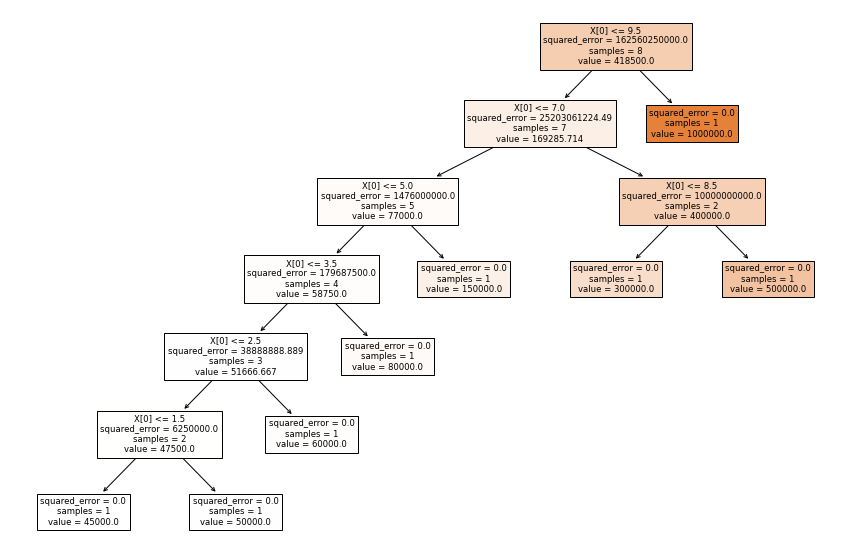

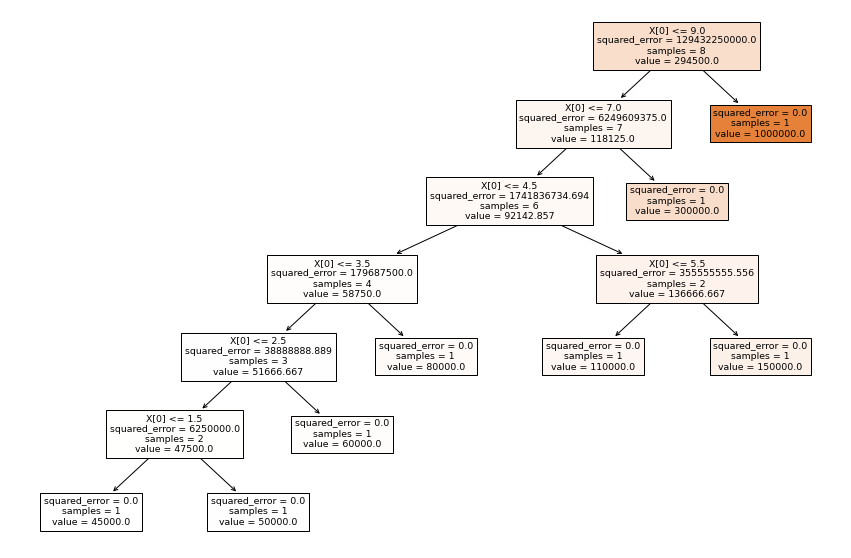

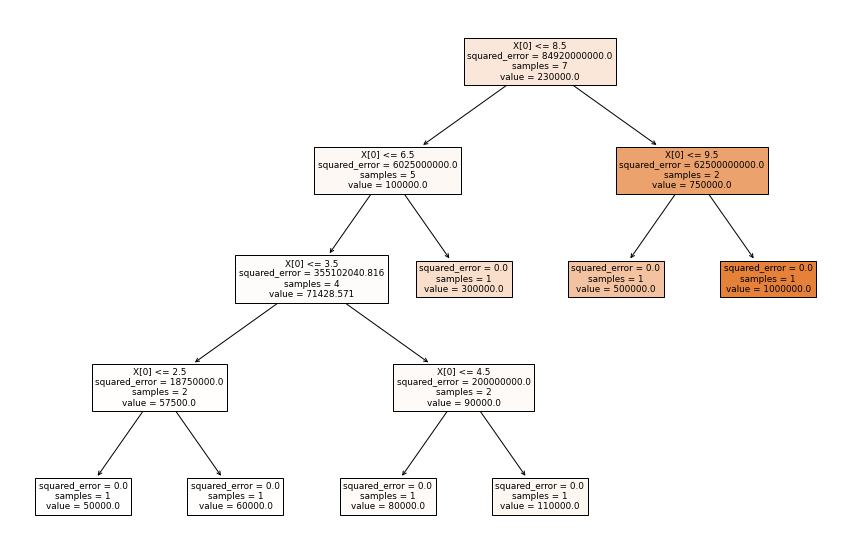

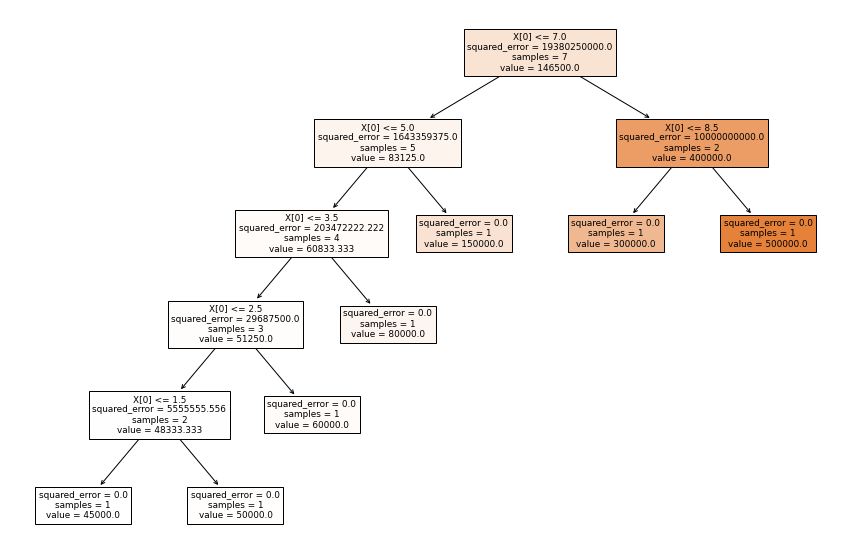

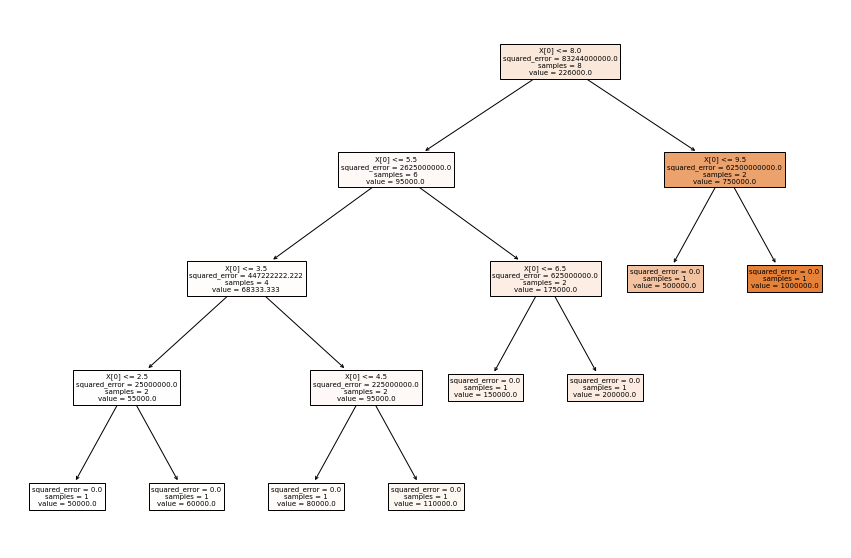

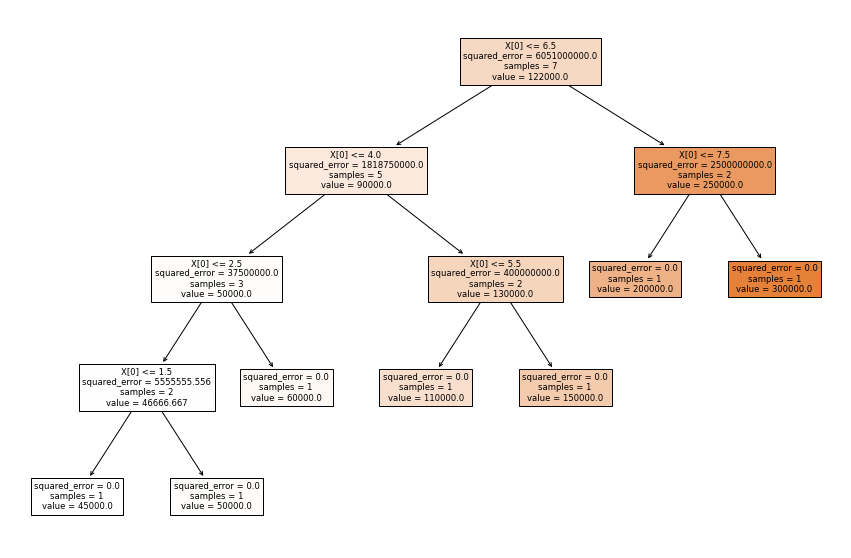

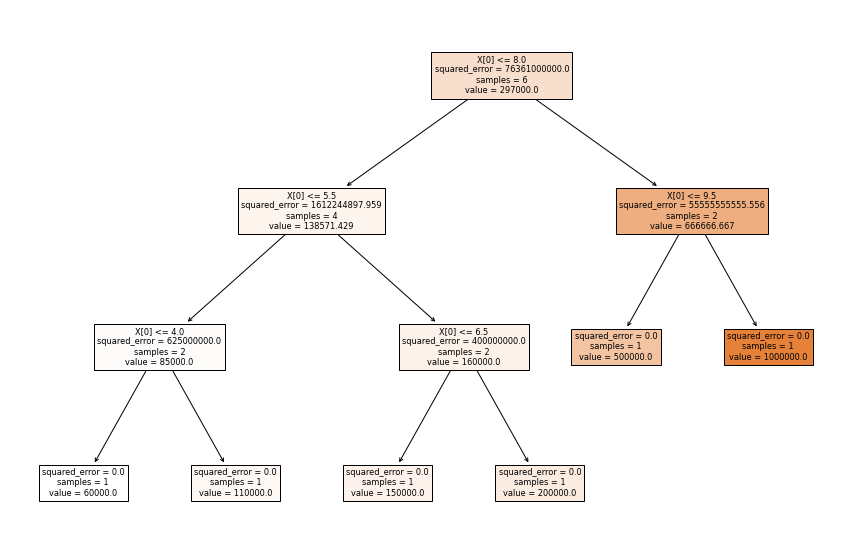

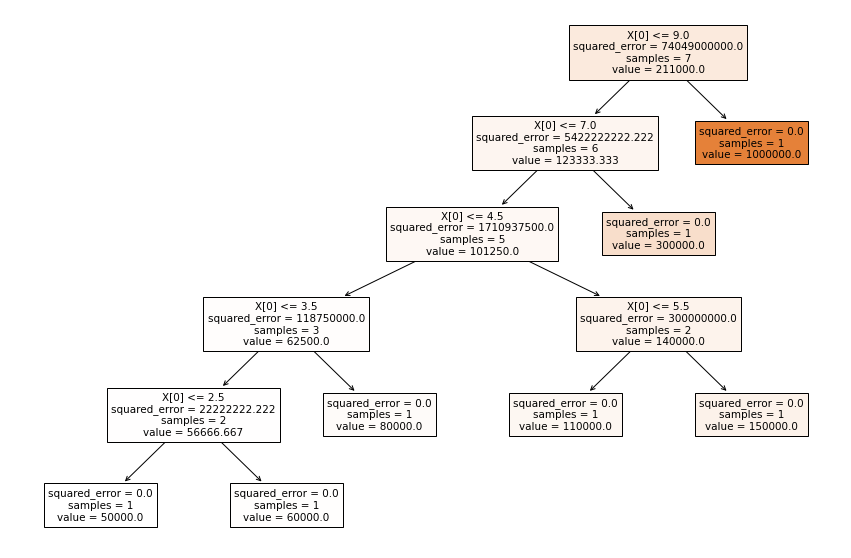

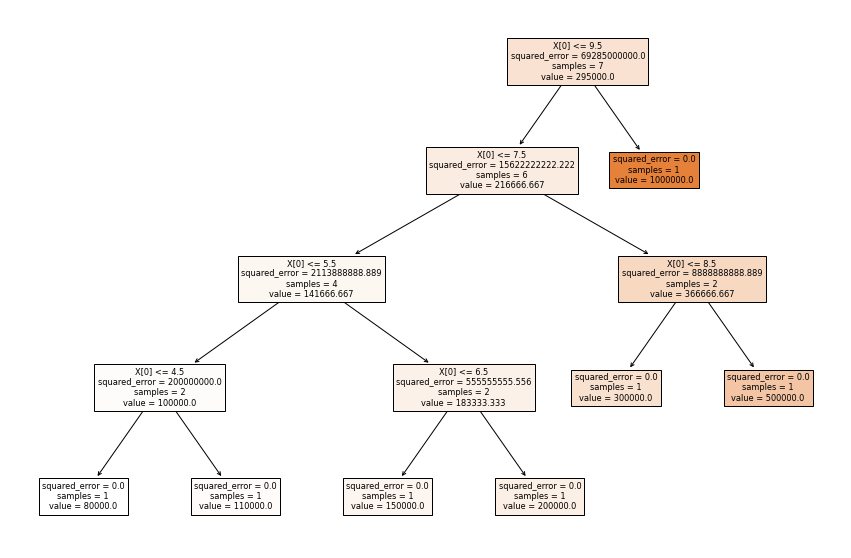

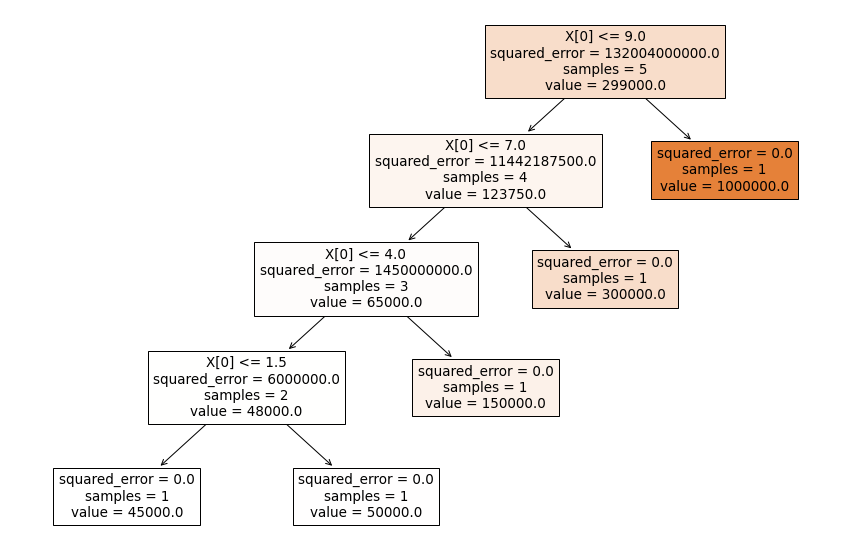

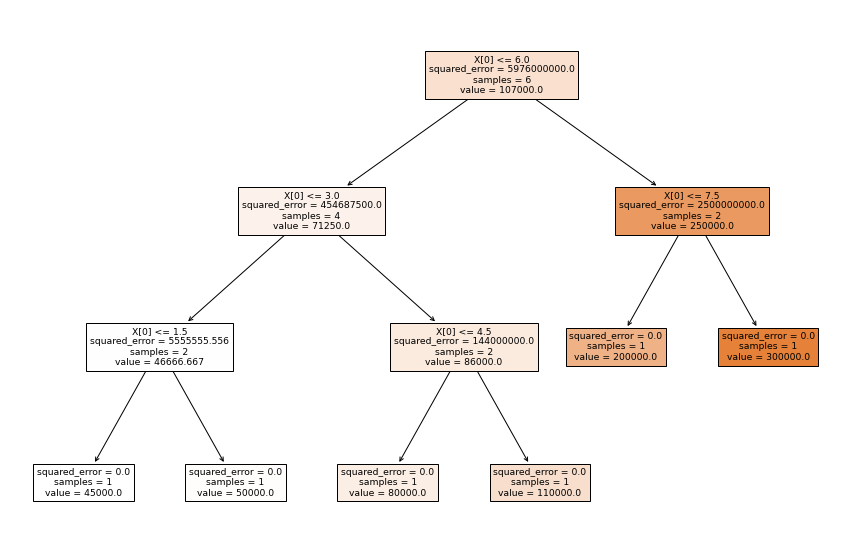

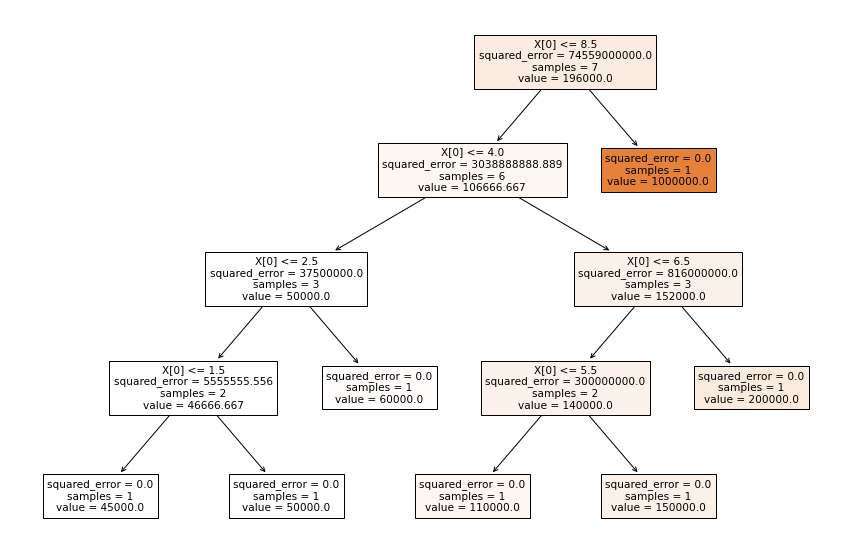

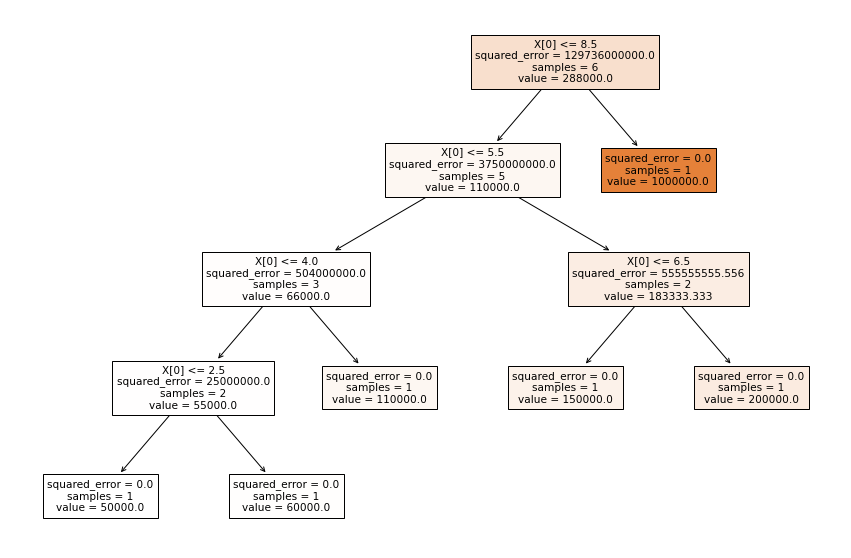

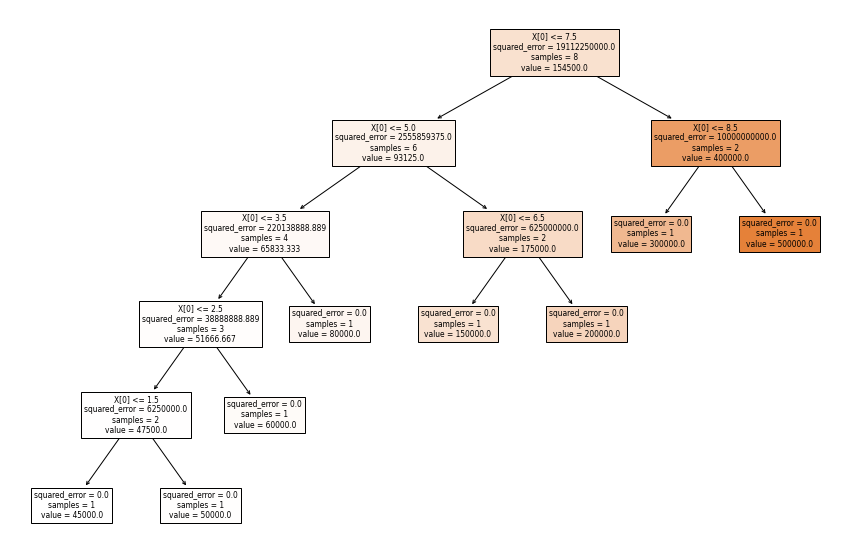

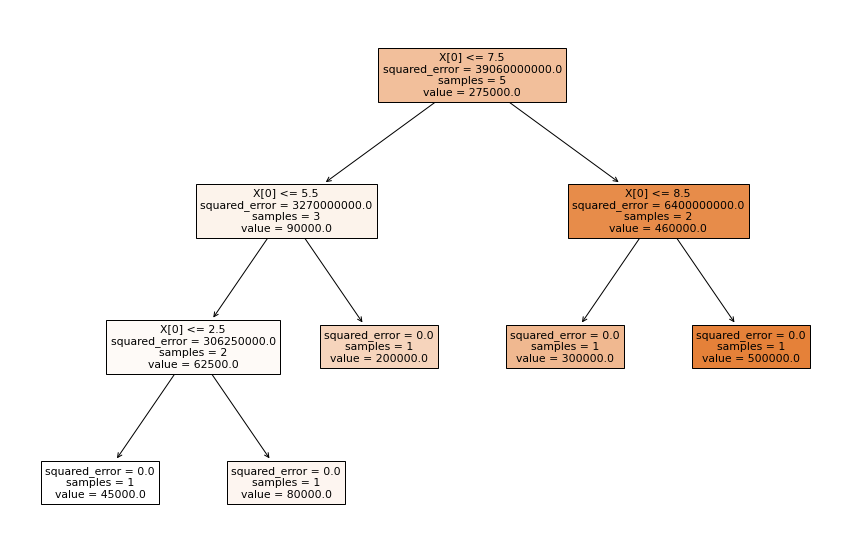

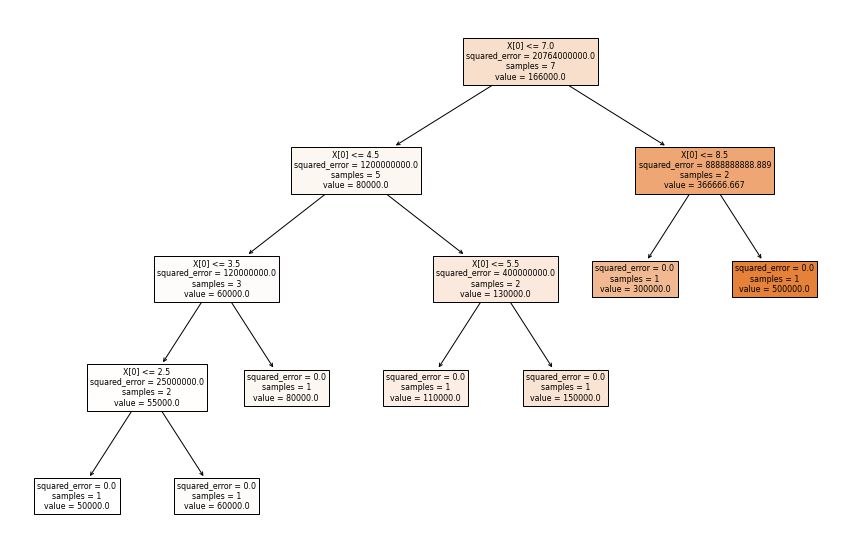

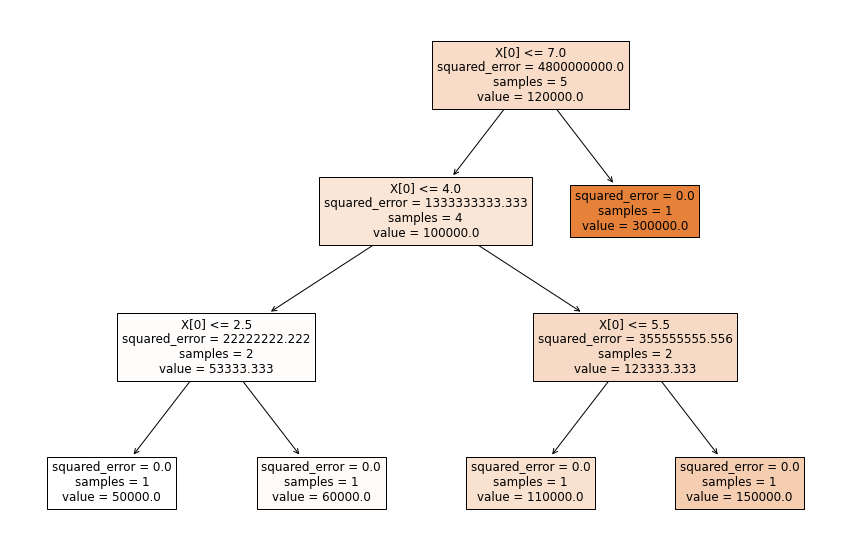

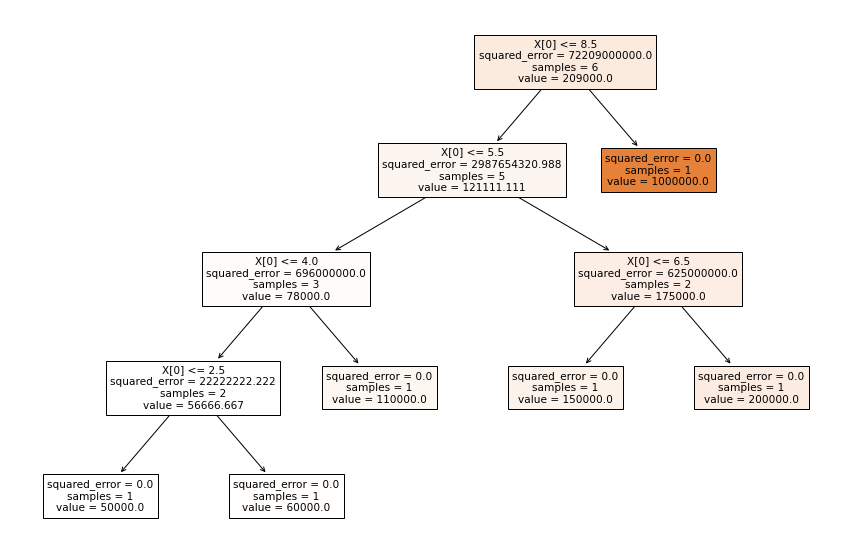

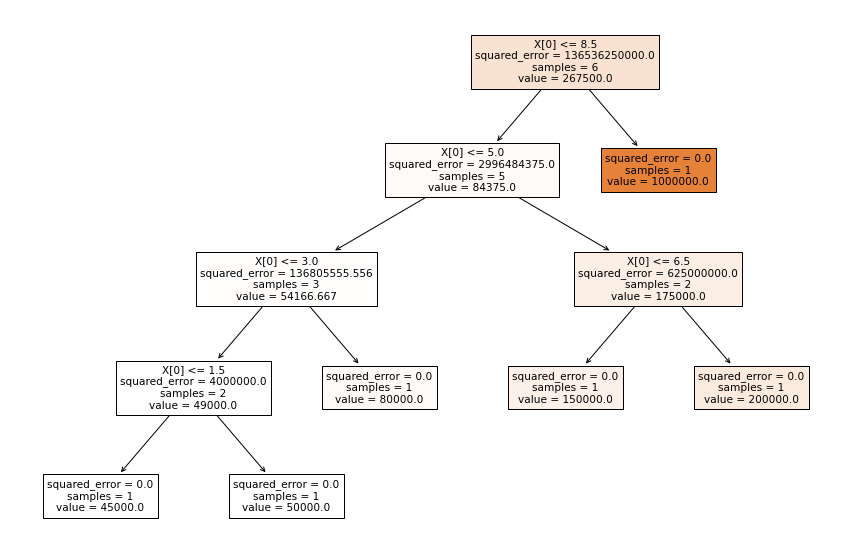

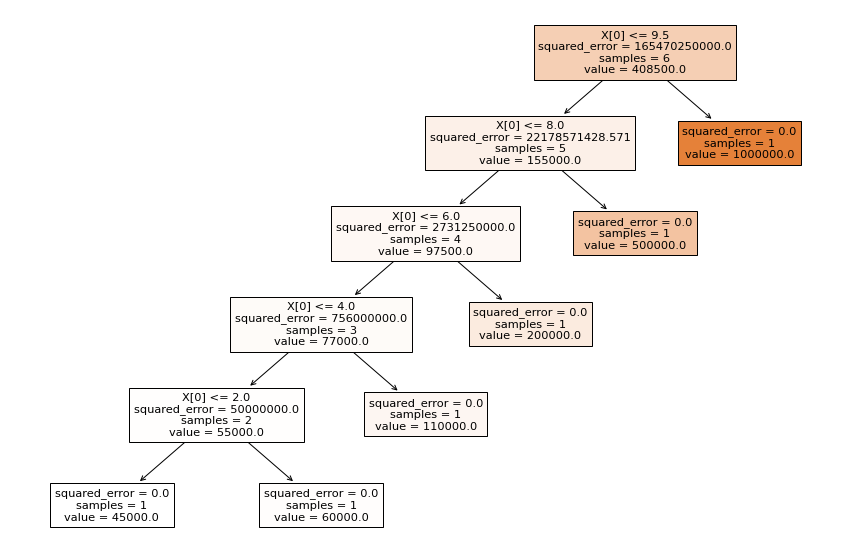

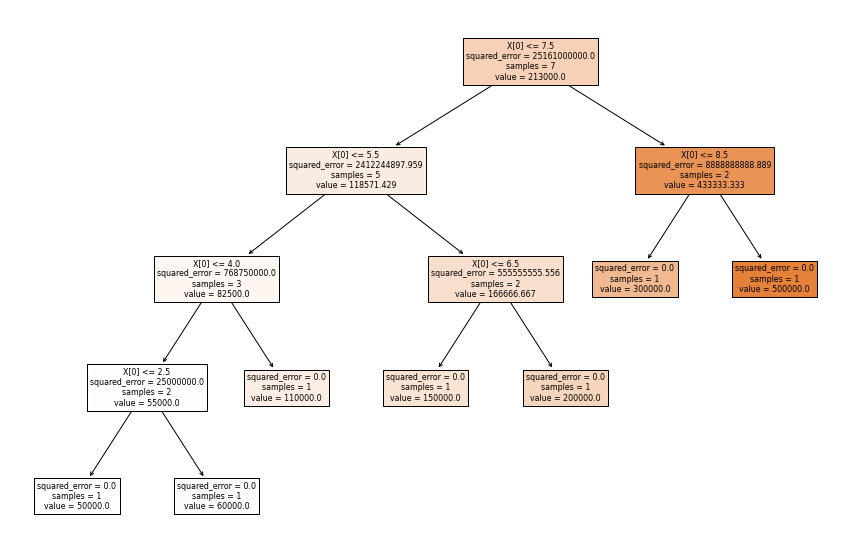

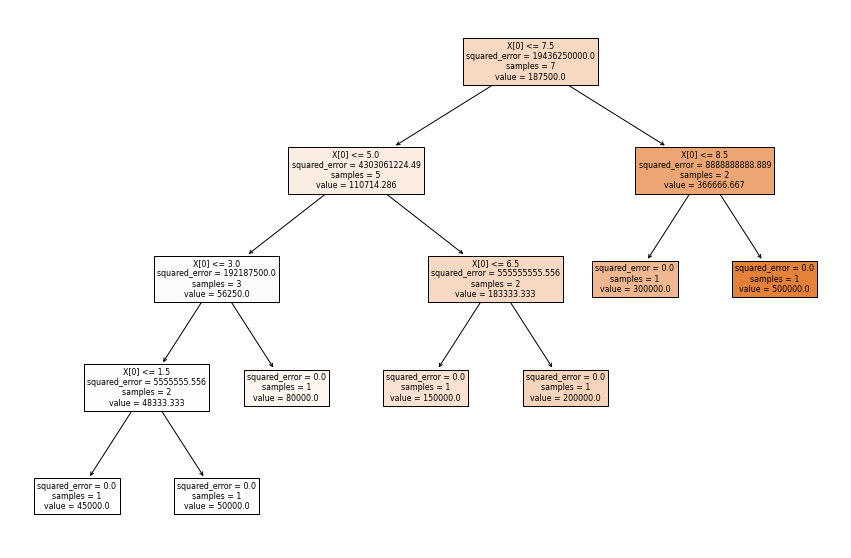

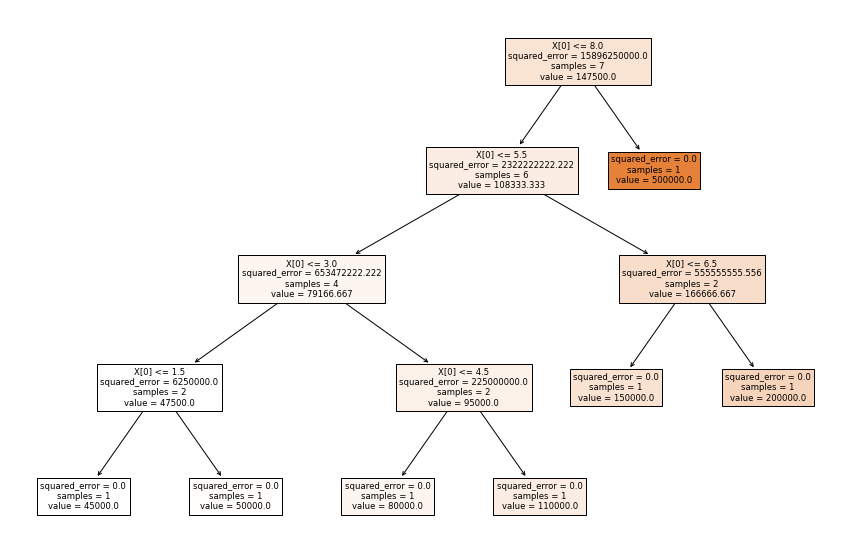

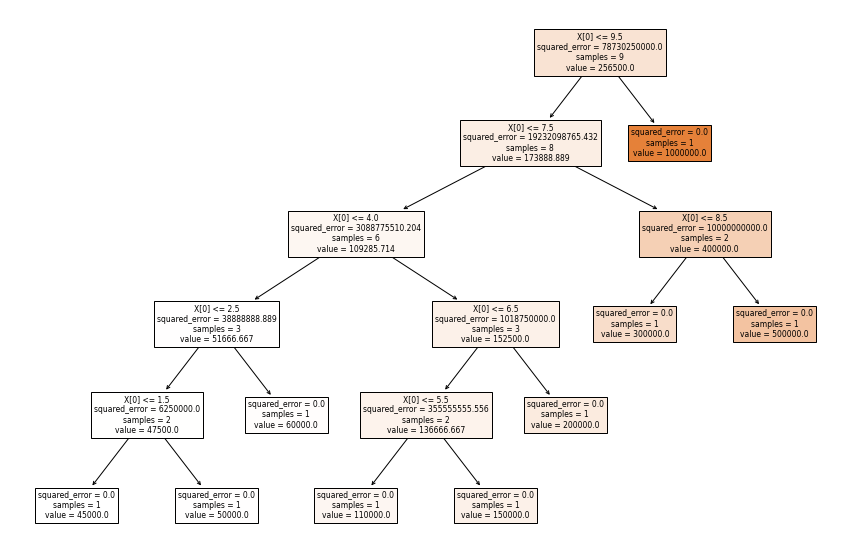

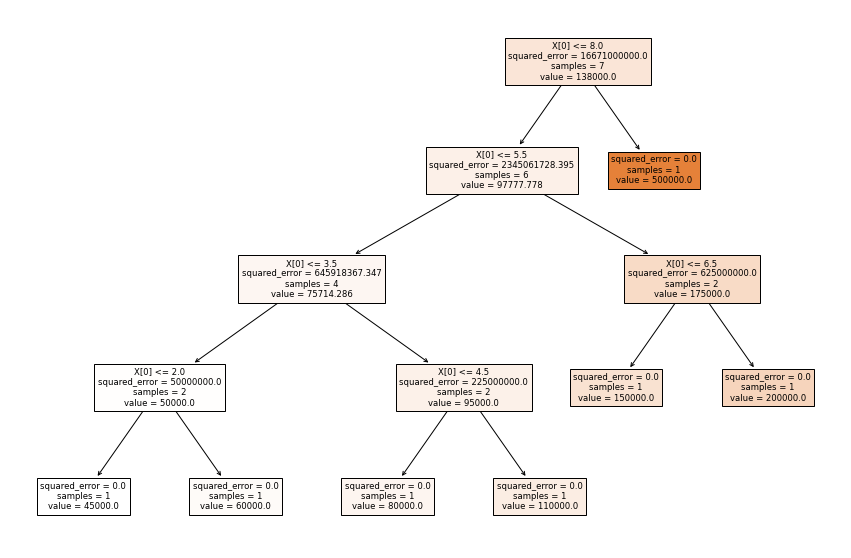

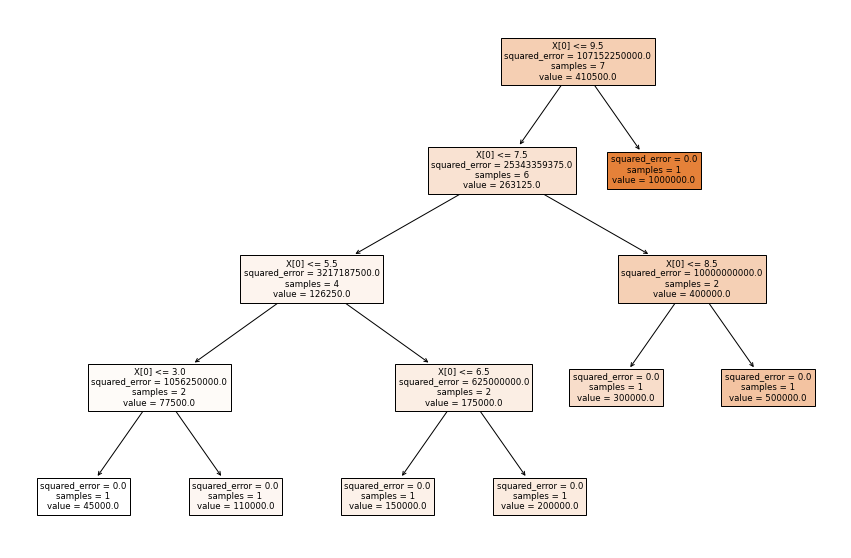

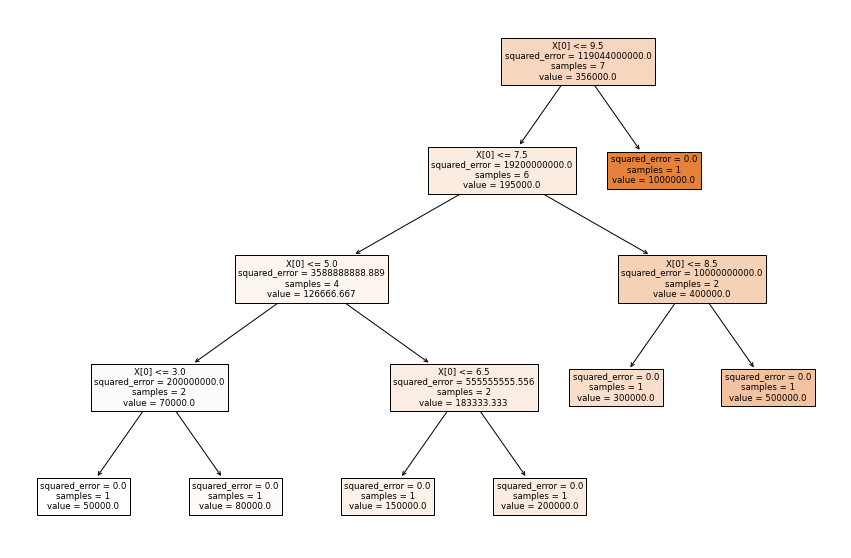

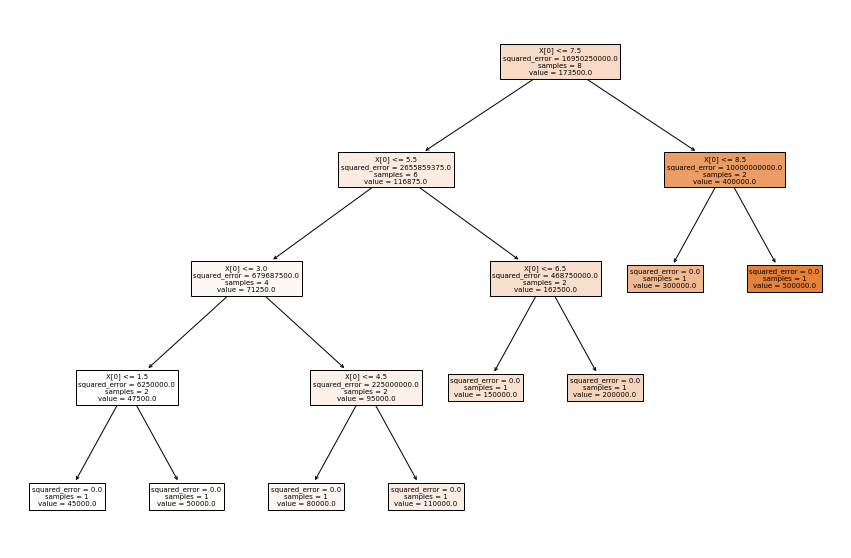

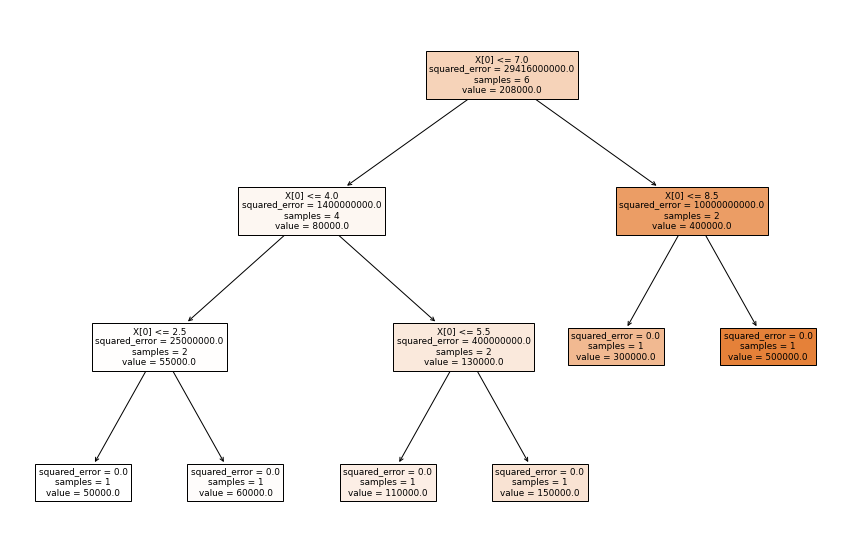

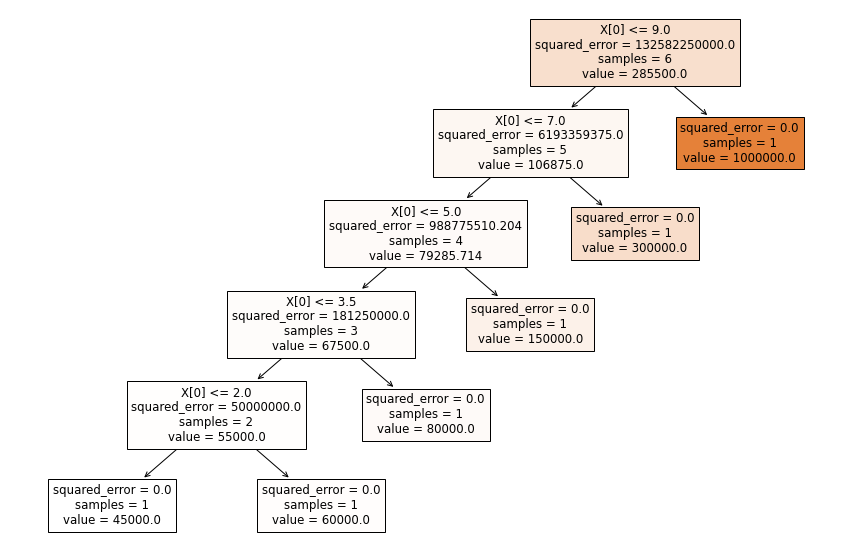

In [21]:
for i in range(0, 100):
    plt.figure(figsize=(15,10))
    tree.plot_tree(model.estimators_[i], filled=True)

In [22]:
y_pred = model.predict([[6.5]])
y_pred

array([158300.])

In [23]:
from sklearn.metrics import mean_squared_error
import math

regression_model_mse = mean_squared_error(y_test,model.predict(x_test))
print('Mean Squared Error:\t',math.sqrt(regression_model_mse))
print("R squared value\t\t",model.score(x,y))

Mean Squared Error:	 319833.74196604086
R squared value		 0.9378393331453065


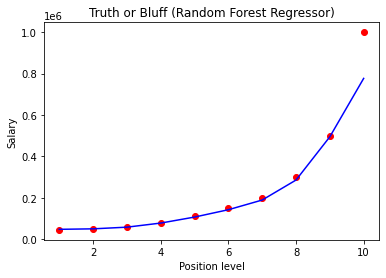

In [24]:
plt.scatter(x,y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regressor)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()